<a href="https://colab.research.google.com/github/anilaksu/Data-Analysis-Science-Interview-Codes/blob/main/Airlines_Data_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Capital One Senior Data Analyst Interview: Airline Data Challenge**
Anil Aksu

Personal e-mail: aaa293@cornell.edu

Work e-mail: anil.aksu@capitalone.com


## Notebook Organization:
- **Organizing the working directory**:
  - Setting up the path to the working directory
  - Importing relevant libraries and loading the data tables
  - Inputting revenue and cost parameters
- **Preprocessing the data**:
  - Checking the missing data in each table
  - Limiting the data relevant to the problem
- **Calculation of Top 10 Busiest Round Trips in Q1 2019**:
  - Data Quality Check and Correction in Active Flights in Q1 2019
  - Data Reorganization and Imputation for Flight Data Table
  - Assigning Flight Direction for each Origin and Destination to form a round trip
  - Calculating # of Round Trips between available Origin and Destination for each Operational Carrier
  - Aggregating # of Round Trips for each Origin and Destination by summing round trips of each Operational Carrier
  - Limiting Airport Code Data to Aiports with IATA Code
  - Joining Airport Size to find both Origin and Destination in the round trip summary table
  - Calculation of Top 10 Busiest Round Trips by ordering the round trip summary table with respect to the round trip count
- **Calculation of Top 10 Most Profitable Round Trips in Q1 2019**:
  - Reorganization and Data cleaning in Tickets Table
  - Aggregation of Tickets Table to find average ITIN FARE for each round trip
  - Joining Tickets Table to add average ITIN FARE for each round trip route in the round trip summary table
  - Calculation of Revenue and Cost drivers for each round trip
  - Calculation of Top 10 Most Profitable Round Trips by ordering the round trip summary table with respect to the total profit
- **Calculation of Top 5 Round Trip Invesment Opportunities for our client**:
  - Removing round trips with extreme total delays in the round trip summary table
  - Filtering round trips data table to the round trips with above average total profit and profit per flight
  - Identifying the round trips with one standard deviation below excess delay than the average excess delay to align our recommendation with "On time, for you"
  - Calculation of Top 5 Most Profitable Round Trips by ordering the round trip summary table with respect to profit per flight
  - Discussion of Key Performance Indicators for our client's business objective
- **Potential additional analyses discussion**




# **1. Organizing Working Directory**

## 1.1 Mount our Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/MyDrive/CapitalOne
!ls # special shell command to view the files in the home directory of the notebook environment

Mounted at /content/gdrive
/content/gdrive/MyDrive/CapitalOne
 Airline_Challenge_Metadata.xlsx   Airport_Codes.csv   Test
'Airlines Data Challenge.ipynb'    Flights.csv	       Tickets.csv


## 1.2 Import Relevant Libraries and Load Data Tables



In [ ]:
# Libraries required to load the data tables and perform diagnostics about the data quality and plot data
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Load data file into a pandas dataframe
col_names = pd.read_csv("Flights.csv", nrows=0).columns.tolist()        # Here we get column names which will allow us to read rows with incomplete information
df_Flights = pd.read_csv("Flights.csv", names=col_names)                # parse to a Pandas DataFrame using pd.read_csv()
col_names = pd.read_csv("Tickets.csv", nrows=0).columns.tolist()        # Here we get column names which will allow us to read rows with incomplete information
df_Tickets = pd.read_csv("Tickets.csv", names=col_names)                # parse to a Pandas DataFrame using pd.read_csv()
col_names = pd.read_csv("Airport_Codes.csv", nrows=0).columns.tolist()  # Here we get column names which will allow us to read rows with incomplete information
df_AirportCodes = pd.read_csv("Airport_Codes.csv", names=col_names)     # parse to a Pandas DataFrame using pd.read_csv()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (3,4,7,10,11,12,13,14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,1,2,7,9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## 1.2 Revenue and Cost Assumptions

In [ ]:
# Here we list Cost assumptions to be used in the further analysis
OperationalCost = 8                # Fuel, Oil, Maintenance, Crew costs in $/mile
DepreciationCost = 1.18            # Depreciation, Insurance, Other cost $/mile
MediumAirportCost = 5000           # Medium Airport Cost for each landing, round trip has two airport charges
LargeAirportCost = 10000           # Large Airport Cost for each landing, round trip has two airport charges
DelayCost = 75                     # Delays more than 15 minutes add $75 per minute to the operational cost
DelayLimit = 15                    # Delay time limit in minutes that will cause additional operational charge
AirplaneCost = 90 * pow(10, 6)     # Cost of each Airplane

# Here we list Revenue assumptions to be used in the further analysis
Capacity = 200                     # Each plane can accomodate 200 passengers
BagFee = 35                        # price for each checked bag for flight
BagRate = 0.5                      # 50% of passengers will have a bags

# **2. Preprocessing the data**

## 2.1 Checking the missing data in each table

In [ ]:
# Here we check the count of rows with incomplete data in each data table
print("Total number of rows in Flight Data Table: ", df_Flights.shape[0], "\n Number of rows with missing data in Flights Data Table:  ", df_Flights.shape[0] - df_Flights.dropna().shape[0])
print("\n Missing Data Entries at each column of Flight Data Table \n", df_Flights.isnull().sum())

print("Total number of rows in Tickets Data Table: ", df_Tickets.shape[0], "\n Number of rows with missing data in Tickets Data Table:  ", df_Tickets.shape[0] - df_Tickets.dropna().shape[0])
print("\n Missing Data Entries at each column of Tickets Data Table \n", df_Tickets.isnull().sum())

print("Total number of rows in Airport Codes Data Table: ", df_AirportCodes.shape[0], "\n Number of rows with missing data in Airport Codes Data Table:  ", df_AirportCodes.shape[0] - df_AirportCodes.dropna().shape[0])
print("\n Missing Data Entries at each column of Airport Codes Data Table \n", df_AirportCodes.isnull().sum())

Total number of rows in Flight Data Table:  3734378 
 Number of rows with missing data in Flights Data Table:   112269

 Missing Data Entries at each column of Flight Data Table 
 FL_DATE                   1
OP_CARRIER                3
TAIL_NUM              23523
OP_CARRIER_FL_NUM        11
ORIGIN_AIRPORT_ID        13
ORIGIN                   18
ORIGIN_CITY_NAME         22
DEST_AIRPORT_ID          26
DESTINATION              31
DEST_CITY_NAME           48
DEP_DELAY             98470
ARR_DELAY            109593
CANCELLED                83
AIR_TIME             110746
DISTANCE               1384
OCCUPANCY_RATE          755
dtype: int64
Total number of rows in Tickets Data Table:  2163996 
 Number of rows with missing data in Tickets Data Table:   5816

 Missing Data Entries at each column of Tickets Data Table 
 ITIN_ID                 0
YEAR                    0
QUARTER                 3
ORIGIN                  5
ORIGIN_COUNTRY          9
ORIGIN_STATE_ABR       12
ORIGIN_STATE_NM        

## 2.2 Limiting the data relevant to the problem

Here we are interested in:

- Remove duplicates in all tables
- Round Trip Tickets in **Tickets Data Table**
- Active Flights in **Flights Data Table**
- Medium and large airports in **Airport Codes Data Table**

In [ ]:
# Here we remove duplicates in all tables
df_Tickets = df_Tickets.drop_duplicates()
df_Flights = df_Flights.drop_duplicates()
df_AirportCodes = df_AirportCodes.drop_duplicates()

# Here we reduce the data tables to the only relevant round trip data
df_Tickets_RoundTrip = df_Tickets[df_Tickets['ROUNDTRIP'] == 1]                                                       # Here we set the round trip flag to 1 for round trip tickets
df_Flights_Active = df_Flights[df_Flights['CANCELLED'] == 0]                                                          # Here we set the cancelled flag to 0 for active flights
df_AirportCodes = df_AirportCodes[df_AirportCodes['TYPE'].apply(lambda x : x in ['medium_airport', 'large_airport'])] # Here we set Airports to only Medium and Large Airports

# Here we reduce Airport Code table to only relevant values for profitability calculations
df_AirportCodes = df_AirportCodes.dropna(subset=['IATA_CODE'])
df_AirportCodes = df_AirportCodes.drop(['NAME','ELEVATION_FT', 'CONTINENT', 'ISO_COUNTRY', 'MUNICIPALITY', 'COORDINATES'],axis=1)

# Data availability in Active Flights Data Table
print("Total number of rows in Active Flights Data Table: ", df_Flights_Active.shape[0], "\n Number of rows with missing data in Active Flights Data Table:  ", df_Flights_Active.shape[0] - df_Flights_Active.dropna().shape[0])
print("\n Missing Data Entries at each column of Active Flights Data Table \n", df_Flights_Active.isnull().sum())

# Data availablity summary in Tickets Data Table
print("Total number of rows in Round Trip Tickets Data Table: ", df_Tickets_RoundTrip.shape[0], "\n Number of rows with missing data in Tickets Data Table:  ", df_Tickets_RoundTrip.shape[0] - df_Tickets_RoundTrip.dropna().shape[0])
print("\n Missing Data Entries at each column of Round Trip Tickets Data Table \n", df_Tickets_RoundTrip.isnull().sum())

# Data availability in Airport Codes Data Table
print("Total number of rows in Airport Codes Data Table: ",df_AirportCodes.shape[0], "\n Number of rows with missing data in Airport Codes Table:  ", df_AirportCodes.shape[0] - df_AirportCodes.dropna().shape[0])
print("\n Missing Data Entries at each column of Airport Codes Data Table \n", df_AirportCodes.isnull().sum())
# Here we are only interested in Airports

Total number of rows in Active Flights Data Table:  1551586 
 Number of rows with missing data in Active Flights Data Table:   3922

 Missing Data Entries at each column of Active Flights Data Table 
 FL_DATE                 0
OP_CARRIER              0
TAIL_NUM                0
OP_CARRIER_FL_NUM       0
ORIGIN_AIRPORT_ID       0
ORIGIN                  0
ORIGIN_CITY_NAME        0
DEST_AIRPORT_ID         0
DESTINATION             0
DEST_CITY_NAME          0
DEP_DELAY               0
ARR_DELAY            3661
CANCELLED               0
AIR_TIME             3791
DISTANCE              123
OCCUPANCY_RATE         63
dtype: int64
Total number of rows in Round Trip Tickets Data Table:  688502 
 Number of rows with missing data in Tickets Data Table:   2313

 Missing Data Entries at each column of Round Trip Tickets Data Table 
 ITIN_ID                 0
YEAR                    0
QUARTER                 0
ORIGIN                  0
ORIGIN_COUNTRY          0
ORIGIN_STATE_ABR        0
ORIGIN_STATE_

## Also, we are interested in the flights in Q1 2019:

- Create a column that indicates quarter of **Active Flights**
- Create a column that indicates quarter of **Round Trip Tickets**

In [ ]:
df_Flights_Active['FL_DATE'] = pd.to_datetime(df_Flights_Active['FL_DATE'],errors='coerce')    # Here we convert FL_DATE to the date format and flag the entries with inaccurate values
df_Flights_Active['Quarters'] = pd.PeriodIndex(df_Flights_Active['FL_DATE'], freq='Q')         # Here we convert dates into Quarters

# Here we convert Tickets to the same quarter format with Flight Data using YEAR and QUARTER columns
df_Tickets_RoundTrip['Quarters'] = df_Tickets_RoundTrip['YEAR'].astype(int).astype(str) + 'Q' + df_Tickets_RoundTrip['QUARTER'].astype(int).astype(str)
df_Tickets_RoundTrip['Quarters'] = pd.to_datetime(df_Tickets_RoundTrip['Quarters']).astype('period[Q]')

# Data availability in Active Flights Data Table
print("Total number of rows in Active Flights Data Table: ", df_Flights_Active.shape[0], "\n Number of rows with missing data in Active Flights Data Table:  ", df_Tickets_RoundTrip.shape[0] - df_Tickets_RoundTrip.dropna().shape[0])
print("\n Missing Data Entries at each column of Active Flights Data Table \n", df_Flights_Active.isnull().sum())

# Data availability in Active Flights Data Table
print("Total number of rows in Round Trip Tickets Data Table: ", df_Tickets_RoundTrip.shape[0], "\n Number of rows with missing data in Round Trip Tickets Data Table:  ", df_Tickets_RoundTrip.shape[0] - df_Tickets_RoundTrip.dropna().shape[0])
print("\n Missing Data Entries at each column of Round Trip Tickets Data Table \n", df_Tickets_RoundTrip.isnull().sum())


<ipython-input-6-4852d0bed8de>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Flights_Active['FL_DATE'] = pd.to_datetime(df_Flights_Active['FL_DATE'],errors='coerce')    # Here we convert FL_DATE to the date format and flag the entries with inaccurate values
<ipython-input-6-4852d0bed8de>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Flights_Active['Quarters'] = pd.PeriodIndex(df_Flights_Active['FL_DATE'], freq='Q')         # Here we convert dates into Quarters
<ipython-input-6-4852d0bed8de>:5: S

Total number of rows in Active Flights Data Table:  1551586 
 Number of rows with missing data in Active Flights Data Table:   2313

 Missing Data Entries at each column of Active Flights Data Table 
 FL_DATE                 5
OP_CARRIER              0
TAIL_NUM                0
OP_CARRIER_FL_NUM       0
ORIGIN_AIRPORT_ID       0
ORIGIN                  0
ORIGIN_CITY_NAME        0
DEST_AIRPORT_ID         0
DESTINATION             0
DEST_CITY_NAME          0
DEP_DELAY               0
ARR_DELAY            3661
CANCELLED               0
AIR_TIME             3791
DISTANCE              123
OCCUPANCY_RATE         63
Quarters                5
dtype: int64
Total number of rows in Round Trip Tickets Data Table:  688502 
 Number of rows with missing data in Round Trip Tickets Data Table:   2313

 Missing Data Entries at each column of Round Trip Tickets Data Table 
 ITIN_ID                 0
YEAR                    0
QUARTER                 0
ORIGIN                  0
ORIGIN_COUNTRY          0
OR

In [ ]:
df_Flights_Active = df_Flights_Active.dropna(subset=['FL_DATE'])                       # Here we drop incorrect dates
df_Flights_1Q2019 = df_Flights_Active[df_Flights_Active['Quarters'] == '2019Q1']       # Here we limit flights to the first quarter of 2019

df_Tickets_RoundTrip=df_Tickets_RoundTrip.drop(['YEAR','QUARTER'],axis=1)               # Here delete unused columns
df_Tickets_1Q2019 = df_Tickets_RoundTrip[df_Tickets_RoundTrip['Quarters'] == '2019Q1']  # Here we limit tickets to the first quarter of 2019

# Data availability in Active Flights Data Table for Q1 2019
print("Total number of rows in Active Flights Q1 2019 Data Table: ", df_Flights_1Q2019.shape[0], "\n Number of rows with missing data in Active Flights Q1 2019 Data Table:  ", df_Flights_1Q2019.shape[0] - df_Flights_1Q2019.dropna().shape[0])
print("\n Missing Data Entries at each column of Active Flights Data Table \n", df_Flights_1Q2019.isnull().sum())

# Data availablity summary in Tickets Data Table for Q1 2019
print("Total number of rows in Round Trip Tickets Q1 2019 Data Table: ", df_Tickets_1Q2019.shape[0], "\n Number of rows with missing data in Round Trip Tickets Q1 2019 Data Table:  ", df_Tickets_1Q2019.shape[0] - df_Tickets_1Q2019.dropna().shape[0])
print("\n Missing Data Entries at each column of Round Trip Tickets Q1 2019 Data Table \n", df_Tickets_1Q2019.isnull().sum())

Total number of rows in Active Flights Q1 2019 Data Table:  1551581 
 Number of rows with missing data in Active Flights Q1 2019 Data Table:   3922

 Missing Data Entries at each column of Active Flights Data Table 
 FL_DATE                 0
OP_CARRIER              0
TAIL_NUM                0
OP_CARRIER_FL_NUM       0
ORIGIN_AIRPORT_ID       0
ORIGIN                  0
ORIGIN_CITY_NAME        0
DEST_AIRPORT_ID         0
DESTINATION             0
DEST_CITY_NAME          0
DEP_DELAY               0
ARR_DELAY            3661
CANCELLED               0
AIR_TIME             3791
DISTANCE              123
OCCUPANCY_RATE         63
Quarters                0
dtype: int64
Total number of rows in Round Trip Tickets Q1 2019 Data Table:  688502 
 Number of rows with missing data in Round Trip Tickets Q1 2019 Data Table:   2313

 Missing Data Entries at each column of Round Trip Tickets Q1 2019 Data Table 
 ITIN_ID                 0
ORIGIN                  0
ORIGIN_COUNTRY          0
ORIGIN_STATE_A

# **3. Top 10 Busiest Round Trips**




## 3.1 Active Flights Q1 2019 Data Sanity Check

- Convert **OCCUPANCY RATE**, **DISTANCE**, **ARR_DELAY**, **DEP_DELAY** columns to numeric values to ensure the format consistency
- Remove inaccurate data in **OCCUPANCY RATE** columns
- Impute NA values of **OCCUPANCY RATE**, **DISTANCE**, **ARR_DELAY**, and **DEP_DELAY** with their mean based on **OP_CARRIER**, **ORIGIN** and **DESTINATION**





In [ ]:
# Here we ensure that Distance and  Occupancy Rate are numeric values
df_Flights_1Q2019['DISTANCE'] = pd.to_numeric(df_Flights_1Q2019['DISTANCE'], errors='coerce')
df_Flights_1Q2019['OCCUPANCY_RATE'] = pd.to_numeric(df_Flights_1Q2019['OCCUPANCY_RATE'], errors='coerce')

# Here we ensure that Departure and  Arrival delays are numeric values
df_Flights_1Q2019['DEP_DELAY'] = pd.to_numeric(df_Flights_1Q2019['DEP_DELAY'], errors='coerce')
df_Flights_1Q2019['ARR_DELAY'] = pd.to_numeric(df_Flights_1Q2019['ARR_DELAY'], errors='coerce')

# Here we check if the occupany rate exceeds 100%, which is not possible
df_Flights_1Q2019 = df_Flights_1Q2019[df_Flights_1Q2019['OCCUPANCY_RATE'] <= 1]

# Data availability in Active Flights Data Table for Q1 2019
print("Total number of rows in Active Flights Q1 2019 Data Table: ", df_Flights_1Q2019.shape[0], "\n Number of rows with missing data in Active Flights Q1 2019 Data Table:  ", df_Flights_1Q2019.shape[0] - df_Flights_1Q2019.dropna().shape[0])
print("\n Missing Data Entries at each column of Active Flights Data Table \n", df_Flights_1Q2019.isnull().sum())
df_Flights_1Q2019.describe()

Total number of rows in Active Flights Q1 2019 Data Table:  1551497 
 Number of rows with missing data in Active Flights Q1 2019 Data Table:   4211

 Missing Data Entries at each column of Active Flights Data Table 
 FL_DATE                 0
OP_CARRIER              0
TAIL_NUM                0
OP_CARRIER_FL_NUM       0
ORIGIN_AIRPORT_ID       0
ORIGIN                  0
ORIGIN_CITY_NAME        0
DEST_AIRPORT_ID         0
DESTINATION             0
DEST_CITY_NAME          0
DEP_DELAY               0
ARR_DELAY            3662
CANCELLED               0
AIR_TIME             3791
DISTANCE              477
OCCUPANCY_RATE          0
Quarters                0
dtype: int64


,DEP_DELAY,ARR_DELAY,DISTANCE,OCCUPANCY_RATE
count,1.551497e+06,1.547835e+06,1.551020e+06,1.551497e+06
mean,1.099449e+01,5.995142e+00,7.639508e+02,6.501645e-01
std,5.027523e+01,5.262252e+01,5.717776e+02,2.021768e-01
min,-5.500000e+01,-9.400000e+01,-1.947000e+03,-7.000000e+00
25%,-6.000000e+00,-1.500000e+01,3.420000e+02,4.800000e-01
50%,-2.000000e+00,-6.000000e+00,6.060000e+02,6.500000e-01
75%,7.000000e+00,9.000000e+00,1.009000e+03,8.300000e-01
max,2.941000e+03,2.923000e+03,9.898000e+03,1.000000e+00


In [ ]:
# Here we perform data imputation using the following columns for each Carrier and Round Trip Route
columns = ['DISTANCE', 'ARR_DELAY', 'DEP_DELAY', 'OCCUPANCY_RATE']

# Here we create the mean of raw flight table to validate the data imputation
df_FlightRawMean = df_Flights_1Q2019.groupby(['OP_CARRIER','ORIGIN','DESTINATION'] ).agg(  DISTANCE =('DISTANCE', 'mean'), ARR_DELAY =('ARR_DELAY', 'mean')
                                            , DEP_DELAY =('DEP_DELAY', 'mean'), OCCUPANCY_RATE =('OCCUPANCY_RATE', 'mean')).reset_index()

# Here we impute data for each Operating Commercial Carrier Flight Code, ORIGIN, and DESTINATION
df_Flights_1Q2019[columns] = df_Flights_1Q2019[columns].fillna(df_Flights_1Q2019.groupby(['OP_CARRIER','ORIGIN','DESTINATION'])[columns].transform('mean'))

# Here we create the mean of imputed flight table to validate the data imputation
df_FlightImputedMean = df_Flights_1Q2019.groupby(['OP_CARRIER','ORIGIN','DESTINATION'] ).agg(  DISTANCE =('DISTANCE', 'mean'), ARR_DELAY =('ARR_DELAY', 'mean')
                                            , DEP_DELAY =('DEP_DELAY', 'mean'), OCCUPANCY_RATE =('OCCUPANCY_RATE', 'mean')).reset_index()

# Data availability in Active Flights Data Table for Q1 2019
print("Total number of rows in Active Flights Q1 2019 Data Table: ", df_Flights_1Q2019.shape[0], "\n Number of rows with missing data in Active Flights Q1 2019 Data Table:  ", df_Flights_1Q2019.shape[0] - df_Flights_1Q2019.dropna().shape[0])
print("\n Missing Data Entries at each column of Active Flights Data Table \n", df_Flights_1Q2019.isnull().sum())
df_Flights_1Q2019.describe()

Total number of rows in Active Flights Q1 2019 Data Table:  1551497 
 Number of rows with missing data in Active Flights Q1 2019 Data Table:   3793

 Missing Data Entries at each column of Active Flights Data Table 
 FL_DATE                 0
OP_CARRIER              0
TAIL_NUM                0
OP_CARRIER_FL_NUM       0
ORIGIN_AIRPORT_ID       0
ORIGIN                  0
ORIGIN_CITY_NAME        0
DEST_AIRPORT_ID         0
DESTINATION             0
DEST_CITY_NAME          0
DEP_DELAY               0
ARR_DELAY               2
CANCELLED               0
AIR_TIME             3791
DISTANCE                2
OCCUPANCY_RATE          0
Quarters                0
dtype: int64


,DEP_DELAY,ARR_DELAY,DISTANCE,OCCUPANCY_RATE
count,1.551497e+06,1.551495e+06,1.551495e+06,1.551497e+06
mean,1.099449e+01,6.000043e+00,7.640240e+02,6.501645e-01
std,5.027523e+01,5.256397e+01,5.717601e+02,2.021768e-01
min,-5.500000e+01,-9.400000e+01,-1.947000e+03,-7.000000e+00
25%,-6.000000e+00,-1.500000e+01,3.420000e+02,4.800000e-01
50%,-2.000000e+00,-6.000000e+00,6.070000e+02,6.500000e-01
75%,7.000000e+00,9.000000e+00,1.009000e+03,8.300000e-01
max,2.941000e+03,2.923000e+03,9.898000e+03,1.000000e+00


In [ ]:
 # We only left with 2 rows which miss DISTANCE and ARR_DELAY, we can drop them
df_Flights_1Q2019 = df_Flights_1Q2019.dropna(subset = ['ARR_DELAY', 'DISTANCE'])
# Here we join df_FlightRawMean and df_FlightImputedMean compare summary statitics of Raw and Imputed Data Tables
df_FlightImputationCheck = pd.merge(df_FlightRawMean, df_FlightImputedMean, on=['OP_CARRIER','ORIGIN','DESTINATION'], how='outer')
df_FlightImputationCheck.describe()

,DISTANCE_x,ARR_DELAY_x,DEP_DELAY_x,OCCUPANCY_RATE_x,DISTANCE_y,ARR_DELAY_y,DEP_DELAY_y,OCCUPANCY_RATE_y
count,11649.000000,11648.000000,11650.000000,11650.000000,11649.000000,11648.000000,11650.000000,11650.000000
mean,838.677489,7.121673,12.153810,0.650217,838.677489,7.121673,12.153810,0.650217
std,605.176570,25.783889,24.744137,0.056387,605.176570,25.783889,24.744137,0.056387
min,2.000000,-53.000000,-25.000000,0.300000,2.000000,-53.000000,-25.000000,0.300000
25%,411.000000,-2.489435,3.022859,0.632259,411.000000,-2.489435,3.022859,0.632259
50%,692.000000,3.951602,8.714663,0.650444,692.000000,3.951602,8.714663,0.650444
75%,1074.000000,12.143506,16.082500,0.667956,1074.000000,12.143506,16.082500,0.667956
max,9898.000000,1388.000000,1403.000000,1.000000,9898.000000,1388.000000,1403.000000,1.000000


In [ ]:
# Here we drop unused columns
df_Flights_1Q2019 =df_Flights_1Q2019.drop(['TAIL_NUM','OP_CARRIER_FL_NUM','CANCELLED', 'AIR_TIME'],axis=1) # Note that we don't use AIR_TIME in any calculations going forward

# Data availability in Active Flights Data Table for Q1 2019
print("Total number of rows in Active Flights Q1 2019 Data Table: ", df_Flights_1Q2019.shape[0], "\n Number of rows with missing data in Active Flights Q1 2019 Data Table:  ", df_Flights_1Q2019.shape[0] - df_Flights_1Q2019.dropna().shape[0])
print("\n Missing Data Entries at each column of Active Flights Data Table \n", df_Flights_1Q2019.isnull().sum())
df_Flights_1Q2019.describe()

Total number of rows in Active Flights Q1 2019 Data Table:  1551493 
 Number of rows with missing data in Active Flights Q1 2019 Data Table:   0

 Missing Data Entries at each column of Active Flights Data Table 
 FL_DATE              0
OP_CARRIER           0
ORIGIN_AIRPORT_ID    0
ORIGIN               0
ORIGIN_CITY_NAME     0
DEST_AIRPORT_ID      0
DESTINATION          0
DEST_CITY_NAME       0
DEP_DELAY            0
ARR_DELAY            0
DISTANCE             0
OCCUPANCY_RATE       0
Quarters             0
dtype: int64


,DEP_DELAY,ARR_DELAY,DISTANCE,OCCUPANCY_RATE
count,1.551493e+06,1.551493e+06,1.551493e+06,1.551493e+06
mean,1.099440e+01,6.000041e+00,7.640247e+02,6.501641e-01
std,5.027522e+01,5.256401e+01,5.717601e+02,2.021769e-01
min,-5.500000e+01,-9.400000e+01,-1.947000e+03,-7.000000e+00
25%,-6.000000e+00,-1.500000e+01,3.420000e+02,4.800000e-01
50%,-2.000000e+00,-6.000000e+00,6.070000e+02,6.500000e-01
75%,7.000000e+00,9.000000e+00,1.009000e+03,8.300000e-01
max,2.941000e+03,2.923000e+03,9.898000e+03,1.000000e+00


## 3.2 Data reorganization in Active Flights Q1 2019 table

- Observe extreme values for **ARR_DELAY** and **DEP_DELAY** columns by histogram plot
- Remove rows with extreme **ARR_DELAY**, and **DEP_DELAY** values



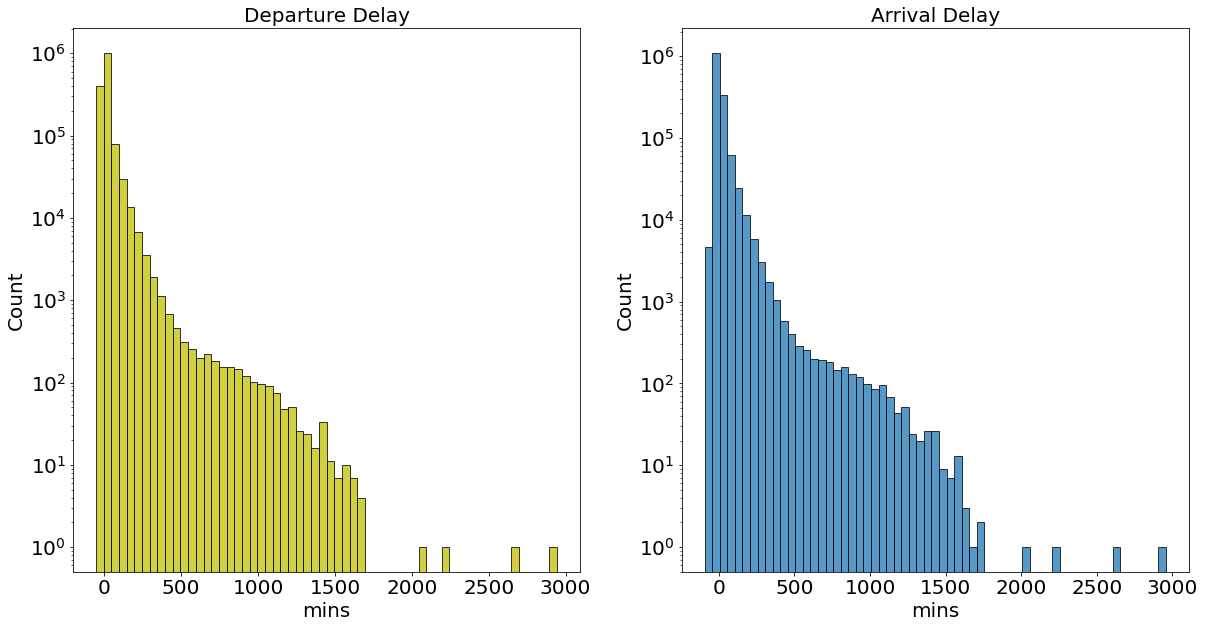

In [ ]:
# Logartihmic Histogram for delays to identify extreme events for arrival and departure delays

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
sns.histplot(df_Flights_1Q2019['DEP_DELAY'], ax=ax[0], color='y', binwidth=50) # Here we use 50 minutes as bin size
ax[0].set_title("Departure Delay", fontsize=20)
ax[0].set_yscale('log')                                                        # We set it to logartihmic scale to easily identify outliers
ax[0].set(xlabel=None)
ax[0].tick_params(axis='x', labelsize=20)
ax[0].tick_params(axis='y', labelsize=20)
ax[0].set_xlabel('mins')
ax[0].xaxis.label.set_size(20)
ax[0].yaxis.label.set_size(20)
sns.histplot(df_Flights_1Q2019['ARR_DELAY'], ax=ax[1], binwidth=50)            # Here we use 50 minutes as bin size
ax[1].set_title("Arrival Delay", fontsize=20)
ax[1].set_yscale('log')                                                        # We set it to logartihmic scale to easily identify outliers
ax[1].set(xlabel=None)
ax[1].tick_params(axis='x', labelsize=20)
ax[1].tick_params(axis='y', labelsize=20)
ax[1].set_xlabel('mins')
ax[1].xaxis.label.set_size(20)
ax[1].yaxis.label.set_size(20)
plt.show()

In [ ]:
# Given the rarity of delays more than 2000 minutes, we can drop them from our data table
df_Flights_1Q2019 = df_Flights_1Q2019[df_Flights_1Q2019['DEP_DELAY'] < 2000]
df_Flights_1Q2019 = df_Flights_1Q2019[df_Flights_1Q2019['ARR_DELAY'] < 2000]

# Data availability in Active Flights Data Table for Q1 2019
print("Total number of rows in Active Flights Q1 2019 Data Table: ", df_Flights_1Q2019.shape[0], "\n Number of rows with missing data in Active Flights Q1 2019 Data Table:  ", df_Flights_1Q2019.shape[0] - df_Flights_1Q2019.dropna().shape[0])
print("\n Missing Data Entries at each column of Active Flights Data Table \n", df_Flights_1Q2019.isnull().sum())
df_Flights_1Q2019.describe()

Total number of rows in Active Flights Q1 2019 Data Table:  1551489 
 Number of rows with missing data in Active Flights Q1 2019 Data Table:   0

 Missing Data Entries at each column of Active Flights Data Table 
 FL_DATE              0
OP_CARRIER           0
ORIGIN_AIRPORT_ID    0
ORIGIN               0
ORIGIN_CITY_NAME     0
DEST_AIRPORT_ID      0
DESTINATION          0
DEST_CITY_NAME       0
DEP_DELAY            0
ARR_DELAY            0
DISTANCE             0
OCCUPANCY_RATE       0
Quarters             0
dtype: int64


,DEP_DELAY,ARR_DELAY,DISTANCE,OCCUPANCY_RATE
count,1.551489e+06,1.551489e+06,1.551489e+06,1.551489e+06
mean,1.098806e+01,5.993722e+00,7.640253e+02,6.501644e-01
std,5.011663e+01,5.241357e+01,5.717607e+02,2.021770e-01
min,-5.500000e+01,-9.400000e+01,-1.947000e+03,-7.000000e+00
25%,-6.000000e+00,-1.500000e+01,3.420000e+02,4.800000e-01
50%,-2.000000e+00,-6.000000e+00,6.070000e+02,6.500000e-01
75%,7.000000e+00,9.000000e+00,1.009000e+03,8.300000e-01
max,1.690000e+03,1.707000e+03,9.898000e+03,1.000000e+00


## Data reorganization functions for calculating delays for calculating excess delay cost and identifying routes with "On time, for you" opportunity
- Create **Excess Delay** columns for delays more than 15 minutes at both departure and arrival and sum them to find out total excess delay
- Create **Positive Delay** columns for both departure and arrival and sum them to find out total positive delay

Note that we create positive delays columns to be used later in the analysis, as our client wants a brand image "**On time, for you**". Therefore, early arrivals or departures may even out late arrivals or departures, if these have large variations. So, we want to focus on Round Trip Routes with lesser positive delays.

In [ ]:
# Here we use the following function to calculate the positive delay time for both arrival delays and departure delays
def PositiveDelay(df,column,DelayLimit):
  conditions = [
    (df_Flights_1Q2019[column] > 0),
    (df_Flights_1Q2019[column] <= 0)
  ]

  #define results
  results = [df_Flights_1Q2019[column], 0]
  return np.select(conditions, results)
# Here we use the following function to calculate the excess time for both arrival delays and departure delays
def ExcessDelay(df,column,DelayLimit):
  conditions = [
    (df_Flights_1Q2019[column] > 15),
    (df_Flights_1Q2019[column] <= 15)
  ]

  #define results
  results = [df_Flights_1Q2019[column]-15, 0]
  return np.select(conditions, results)

In [ ]:
# Here we need to join Flights table and Airport Code table to include the associated cost with Operational Costs, Maintenance Cost and Airport Maintenance Cost
df_Flights_1Q2019['DISTANCE'] = pd.to_numeric(df_Flights_1Q2019['DISTANCE'], errors='coerce')
df_Flights_1Q2019['OCCUPANCY_RATE'] = pd.to_numeric(df_Flights_1Q2019['OCCUPANCY_RATE'], errors='coerce')

# Here we ensure that Departure and  Arrival delays are numeric values
df_Flights_1Q2019['DEP_DELAY'] = pd.to_numeric(df_Flights_1Q2019['DEP_DELAY'], errors='coerce')
df_Flights_1Q2019['ARR_DELAY'] = pd.to_numeric(df_Flights_1Q2019['ARR_DELAY'], errors='coerce')
#create new column for departure delay based on excess delays which impacts the cost
df_Flights_1Q2019['EXCESS_DEP_DELAY'] = ExcessDelay(df_Flights_1Q2019,'DEP_DELAY',DelayLimit)
df_Flights_1Q2019['EXCESS_ARR_DELAY'] = ExcessDelay(df_Flights_1Q2019,'ARR_DELAY',DelayLimit)
#create new column for departure delay based on excess delays which impacts the cost
df_Flights_1Q2019['POSITIVE_DEP_DELAY'] = PositiveDelay(df_Flights_1Q2019,'DEP_DELAY',DelayLimit)
df_Flights_1Q2019['POSITIVE_ARR_DELAY'] = PositiveDelay(df_Flights_1Q2019,'ARR_DELAY',DelayLimit)

# Total Excess Delay and Positive Delay columns
df_Flights_1Q2019['EXCESS_DELAY'] = df_Flights_1Q2019['EXCESS_ARR_DELAY'] + df_Flights_1Q2019['EXCESS_DEP_DELAY']
df_Flights_1Q2019['POSITIVE_DELAY'] = df_Flights_1Q2019['POSITIVE_ARR_DELAY'] + df_Flights_1Q2019['POSITIVE_DEP_DELAY']


# Data availability in Active Flights Data Table for Q1 2019
print("Total number of rows in Active Flights Q1 2019 Data Table: ", df_Flights_1Q2019.shape[0], "\n Number of rows with missing data in Active Flights Q1 2019 Data Table:  ", df_Flights_1Q2019.shape[0] - df_Flights_1Q2019.dropna().shape[0])
print("\n Missing Data Entries at each column of Active Flights Data Table \n", df_Flights_1Q2019.isnull().sum())
df_Flights_1Q2019.describe()

Total number of rows in Active Flights Q1 2019 Data Table:  1551489 
 Number of rows with missing data in Active Flights Q1 2019 Data Table:   0

 Missing Data Entries at each column of Active Flights Data Table 
 FL_DATE               0
OP_CARRIER            0
ORIGIN_AIRPORT_ID     0
ORIGIN                0
ORIGIN_CITY_NAME      0
DEST_AIRPORT_ID       0
DESTINATION           0
DEST_CITY_NAME        0
DEP_DELAY             0
ARR_DELAY             0
DISTANCE              0
OCCUPANCY_RATE        0
Quarters              0
EXCESS_DEP_DELAY      0
EXCESS_ARR_DELAY      0
POSITIVE_DEP_DELAY    0
POSITIVE_ARR_DELAY    0
EXCESS_DELAY          0
POSITIVE_DELAY        0
dtype: int64


,DEP_DELAY,ARR_DELAY,DISTANCE,OCCUPANCY_RATE,EXCESS_DEP_DELAY,EXCESS_ARR_DELAY,POSITIVE_DEP_DELAY,POSITIVE_ARR_DELAY,EXCESS_DELAY,POSITIVE_DELAY
count,1.551489e+06,1.551489e+06,1.551489e+06,1.551489e+06,1.551489e+06,1.551489e+06,1.551489e+06,1.551489e+06,1.551489e+06,1.551489e+06
mean,1.098806e+01,5.993722e+00,7.640253e+02,6.501644e-01,1.049256e+01,1.064358e+01,1.429747e+01,1.472301e+01,2.113614e+01,2.902049e+01
std,5.011663e+01,5.241357e+01,5.717607e+02,2.021770e-01,4.616630e+01,4.606942e+01,4.901853e+01,4.891852e+01,9.178792e+01,9.732052e+01
min,-5.500000e+01,-9.400000e+01,-1.947000e+03,-7.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,-6.000000e+00,-1.500000e+01,3.420000e+02,4.800000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,-2.000000e+00,-6.000000e+00,6.070000e+02,6.500000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,7.000000e+00,9.000000e+00,1.009000e+03,8.300000e-01,0.000000e+00,0.000000e+00,7.000000e+00,9.000000e+00,0.000000e+00,1.600000e+01
max,1.690000e+03,1.707000e+03,9.898000e+03,1.000000e+00,1.675000e+03,1.692000e+03,1.690000e+03,1.707000e+03,3.367000e+03,3.397000e+03


## 3.3 Data Aggregation for each Operating Carrier and Route
- A round trip includes two trips, which are $\mathcal{A}→\mathcal{B}$ and $\mathcal{B}→\mathcal{A}$. Therefore, we need to classify these flights as **Forward** flights and **Backward** flights to be able to count the number of these round trips. Here we use **Alphabetical** order of ORIGIN and DESTINATION to assign an indicator column that specifies Forward flight and Backward flight.
- Even though there may be round trips between $\mathcal{A}$ and $\mathcal{B}$, not every flight between them forms a round trip, we need to sum these both Forward flights and Backward flights individually, and $\min(N_{\mathcal{A}→\mathcal{B}}, N_{\mathcal{B}→\mathcal{A}})$ determines the number of round trips between these airports.
- Here, we aggregate Flight Data for each Operating Carrier using **OP_CARRIER** and route using **ORIGIN** and **DESTINATION**, then count number of flighs, and calculate mean **Excess Delay**, **Positive Delay**, **Distance**, and **Occupancy Rate**
- Then, we divide the table into **Forward flights** and **Backward flights** tables, then join them on **Operating Carrier** and cross join **Origin** and **Destination** columns in each table to ensure that they are on the same route forming a round trip.

In [ ]:
# Here the alphabetical order of ORIGIN and DESTINATION to divide flight summary into forward and backward flights
def FlightOrder(df):
  conditions = [
    (df['ORIGIN'] < df['DESTINATION']),
    (df['ORIGIN'] > df['DESTINATION'])
  ]

  #define results
  results = ['Y', 'N']
  return np.select(conditions, results)

# Here we compare forward flight count and backward flight count and the smallest one sets the round trip count
def RoundTripCount(df):
  conditions = [
    (df['FORWARD_FLIGHT_COUNT'] <= df['BACKWARD_FLIGHT_COUNT']),
    (df['FORWARD_FLIGHT_COUNT'] > df['BACKWARD_FLIGHT_COUNT'])
  ]

  #define results
  results = [df['FORWARD_FLIGHT_COUNT'], df['BACKWARD_FLIGHT_COUNT']]
  return np.select(conditions, results)


# Here we use the following function to calculate the averaged values for the round trip
def getRoundTripAverage(df, columns):

    for col in columns:
        # Column names for joined tables
        col1 = col + '_x'
        col2 = col + '_y'
        df[col] = 0.5 * (df[col1]+df[col2])

In [ ]:
# Here we group flights based on their Operating Commerical Carrier Flight Code and ORIGIN and Destination
df_Carriers = df_Flights_1Q2019.groupby(['OP_CARRIER','ORIGIN','DESTINATION'] ).agg(  FLIGHT_COUNT =('FL_DATE', 'count'), EXC_DELAY =('EXCESS_DELAY', 'mean')
                                            ,POS_DELAY =('POSITIVE_DELAY', 'mean')     , DISTANCE =('DISTANCE', 'mean'), OCCUPANCY_RATE =('OCCUPANCY_RATE', 'mean')).reset_index()

# This variable enables us to separate forward and backward flights in a round trip by ordering ORIGIN and DESTINATION by alphabetical order
df_Carriers['FORWARD_FLIGHT'] = FlightOrder(df_Carriers)

df_Carriers_F = df_Carriers[df_Carriers['FORWARD_FLIGHT'] == 'Y']                           # Here we get Forward Flights Table
df_Carriers_F  = df_Carriers_F.rename(columns={"FLIGHT_COUNT": "FORWARD_FLIGHT_COUNT"})     # Here we rename FLIGHT_COUNT to FORWARD_FLIGHT_COUNT

df_Carriers_B = df_Carriers[df_Carriers['FORWARD_FLIGHT'] == 'N']                           # Here we get Backward Flights Table
df_Carriers_B  = df_Carriers_B.rename(columns={"FLIGHT_COUNT": "BACKWARD_FLIGHT_COUNT"})    # Here we rename FLIGHT_COUNT to BACKWARD_FLIGHT_COUNT

# Here we merge and drop unnecessary columns
df_RoundTrip = pd.merge(df_Carriers_F, df_Carriers_B, left_on=['OP_CARRIER','ORIGIN','DESTINATION'], right_on=['OP_CARRIER','DESTINATION','ORIGIN'], how='outer')

df_RoundTrip['ROUNDTRIP_COUNT'] = RoundTripCount(df_RoundTrip)                                               # Here we add round trip count by taking MIN(FORWARD_FLIGHT_COUNT,BACKWARD_FLIGHT_COUNT)
df_RoundTrip = df_RoundTrip.drop(['ORIGIN_y','DESTINATION_y','FORWARD_FLIGHT_x','FORWARD_FLIGHT_y'],axis=1)  # Here we drop unnecessary columns going forward
df_RoundTrip = df_RoundTrip.rename(columns={"ORIGIN_x": "ORIGIN", "DESTINATION_x": "DESTINATION"})           # Here we rename ORIGIN_x and DESTINATION_x for convenience of notation
df_RoundTrip['ROUND_TRIP'] = df_RoundTrip['ORIGIN'] + ' to ' + df_RoundTrip['DESTINATION']                   # Round Trip Info Column

# List of columns which we average
avg_columns = ['DISTANCE', 'POS_DELAY', 'EXC_DELAY', 'OCCUPANCY_RATE' ]
getRoundTripAverage(df_RoundTrip, avg_columns)

# Data availability in Active Flights Data Table for Q1 2019
print("Total number of rows in Round Trip Flights for each Operating Carrier Data Table: ", df_RoundTrip.shape[0], "\n Number of rows with missing data in Round Trip Flights for each Operating Carrier Data Table:  ", df_RoundTrip.shape[0] - df_RoundTrip.dropna().shape[0])
print("\n Missing Data Entries at each column of Round Trip Flights for each Operating Carrier Data Table \n", df_RoundTrip.isnull().sum())


Total number of rows in Round Trip Flights for each Operating Carrier Data Table:  5934 
 Number of rows with missing data in Round Trip Flights for each Operating Carrier Data Table:   222

 Missing Data Entries at each column of Round Trip Flights for each Operating Carrier Data Table 
 OP_CARRIER                 0
ORIGIN                   123
DESTINATION              123
FORWARD_FLIGHT_COUNT     123
EXC_DELAY_x              123
POS_DELAY_x              123
DISTANCE_x               123
OCCUPANCY_RATE_x         123
BACKWARD_FLIGHT_COUNT     99
EXC_DELAY_y               99
POS_DELAY_y               99
DISTANCE_y                99
OCCUPANCY_RATE_y          99
ROUNDTRIP_COUNT            0
ROUND_TRIP               123
DISTANCE                 222
POS_DELAY                222
EXC_DELAY                222
OCCUPANCY_RATE           222
dtype: int64


## 3.4 Summary of All Round Trips
- Remove all rows without ORIGIN and DESTINATION
- Aggregate Flight Data for **ROUND_TRIP** route using **ORIGIN** and **DESTINATION** for all **OP_CARRIER** , then sum **ROUNDTRIP_COUNT**, and calculate mean **Excess Delay**, **Positive Delay**, **Distance**, and **Occupancy Rate**
- Order each **ROUND_TRIP** route by **ROUNDTRIP_COUNT** without Airport Size data first
- Check data sanity for Round Trip Summary before joining it with Airport Code Data
- Join Round Trip Summary with Airport Code table
- Drop rows in Round Trip Summary table without Airport Size data
Note that our client is only interested in Medium and Large airport so that we restrict our attention to the round trips with these airports at both ORIGIN and DESTINATIOn

In [ ]:
# Here we drop all round trips without ORIGIN and DESTINATION
df_RoundTrip = df_RoundTrip.dropna(subset = ['ORIGIN', 'DESTINATION'])

# Here we sum all round trips for each OP Carrier on the same round trip route
df_RoundTripSummary = df_RoundTrip.groupby(['ROUND_TRIP','ORIGIN','DESTINATION'] ).agg(  ROUNDTRIP_COUNT =('ROUNDTRIP_COUNT', 'sum'), DISTANCE =('DISTANCE', 'mean')
                            , POS_DELAY =('POS_DELAY', 'mean') , EXC_DELAY =('EXC_DELAY', 'mean') , OCCUPANCY_RATE =('OCCUPANCY_RATE', 'mean')).reset_index()
# Data availability in Round Trip for Q1 2019
print("Total number of rows in Round Trip Summary Data Table: ", df_RoundTripSummary.shape[0], "\n Number of rows with missing data in Round Trip Summary Data Table:  ", df_RoundTripSummary.shape[0] - df_RoundTripSummary.dropna().shape[0])
print("\n Missing Data Entries at each column of Round Trip Summary Data Table \n", df_RoundTripSummary.isnull().sum())

df_RoundTripSummary.sort_values(by = 'ROUNDTRIP_COUNT', ascending = False).head(10)

Total number of rows in Round Trip Summary Data Table:  2937 
 Number of rows with missing data in Round Trip Summary Data Table:   11

 Missing Data Entries at each column of Round Trip Summary Data Table 
 ROUND_TRIP          0
ORIGIN              0
DESTINATION         0
ROUNDTRIP_COUNT     0
DISTANCE           11
POS_DELAY          11
EXC_DELAY          11
OCCUPANCY_RATE     11
dtype: int64


,ROUND_TRIP,ORIGIN,DESTINATION,ROUNDTRIP_COUNT,DISTANCE,POS_DELAY,EXC_DELAY,OCCUPANCY_RATE
2234,LAX to SFO,LAX,SFO,3503.0,337.0,46.630093,35.994881,0.647963
2275,LGA to ORD,LGA,ORD,3059.0,733.0,63.279160,51.231526,0.653932
2137,LAS to LAX,LAS,LAX,2729.0,236.0,25.730938,17.730764,0.648602
562,BOS to LGA,BOS,LGA,2608.0,184.0,53.416379,43.847065,0.645295
2078,JFK to LAX,JFK,LAX,2286.0,2475.0,22.138916,15.429191,0.650946
2237,LAX to SJC,LAX,SJC,2044.0,308.0,22.932817,14.685306,0.668606
2705,PDX to SEA,PDX,SEA,2007.0,129.0,22.547283,15.112628,0.642576
192,ATL to MCO,ATL,MCO,1907.0,404.0,20.974966,14.017942,0.649219
2233,LAX to SEA,LAX,SEA,1885.0,954.0,20.433310,13.238138,0.673129
2219,LAX to PHX,LAX,PHX,1777.0,370.0,24.346838,17.270055,0.653347


In [ ]:
# Here we join Flight Data table with Airport Code table to get all relevant values for profitability calculations
# Here we add Origin Size
df_RoundTripSummary = pd.merge(df_RoundTripSummary, df_AirportCodes, left_on=['ORIGIN'], right_on=['IATA_CODE'], how='left')
df_RoundTripSummary = df_RoundTripSummary.drop(['IATA_CODE'],axis=1)                        # Here we drop IATA_CODE column
df_RoundTripSummary = df_RoundTripSummary.rename(columns={"TYPE": "ORIGIN_SIZE"})           # Here we rename it to ORIGIN SIZE
# Here we add Destination Size
df_RoundTripSummary = pd.merge(df_RoundTripSummary, df_AirportCodes, left_on=['DESTINATION'], right_on=['IATA_CODE'], how='left')
df_RoundTripSummary = df_RoundTripSummary.drop(['IATA_CODE'],axis=1)                        # Here we drop IATA_CODE column
df_RoundTripSummary = df_RoundTripSummary.rename(columns={"TYPE": "DESTINATION_SIZE"})      # Here we rename it to DESTINATION SIZE

# Data availability in Round Trip Summary Table
print("Total number of rows in Round Trip Summary Data Table: ", df_RoundTripSummary.shape[0], "\n Number of rows with missing data in Tickets Data Table:  ", df_RoundTripSummary.shape[0] - df_RoundTripSummary.dropna().shape[0])
print("\n Missing Data Entries at each column of Round Trip Summary Data Table \n", df_RoundTripSummary.isnull().sum())
# Here we list top 10 busiest Round Trips
df_RoundTripSummary.sort_values(by = 'ROUNDTRIP_COUNT', ascending = False).head(10)

Total number of rows in Round Trip Summary Data Table:  2937 
 Number of rows with missing data in Tickets Data Table:   103

 Missing Data Entries at each column of Round Trip Summary Data Table 
 ROUND_TRIP           0
ORIGIN               0
DESTINATION          0
ROUNDTRIP_COUNT      0
DISTANCE            11
POS_DELAY           11
EXC_DELAY           11
OCCUPANCY_RATE      11
ORIGIN_SIZE         45
DESTINATION_SIZE    50
dtype: int64


,ROUND_TRIP,ORIGIN,DESTINATION,ROUNDTRIP_COUNT,DISTANCE,POS_DELAY,EXC_DELAY,OCCUPANCY_RATE,ORIGIN_SIZE,DESTINATION_SIZE
2234,LAX to SFO,LAX,SFO,3503.0,337.0,46.630093,35.994881,0.647963,large_airport,large_airport
2275,LGA to ORD,LGA,ORD,3059.0,733.0,63.279160,51.231526,0.653932,large_airport,large_airport
2137,LAS to LAX,LAS,LAX,2729.0,236.0,25.730938,17.730764,0.648602,large_airport,large_airport
562,BOS to LGA,BOS,LGA,2608.0,184.0,53.416379,43.847065,0.645295,large_airport,large_airport
2078,JFK to LAX,JFK,LAX,2286.0,2475.0,22.138916,15.429191,0.650946,large_airport,large_airport
2237,LAX to SJC,LAX,SJC,2044.0,308.0,22.932817,14.685306,0.668606,large_airport,large_airport
2705,PDX to SEA,PDX,SEA,2007.0,129.0,22.547283,15.112628,0.642576,large_airport,large_airport
192,ATL to MCO,ATL,MCO,1907.0,404.0,20.974966,14.017942,0.649219,large_airport,large_airport
2233,LAX to SEA,LAX,SEA,1885.0,954.0,20.433310,13.238138,0.673129,large_airport,large_airport
2219,LAX to PHX,LAX,PHX,1777.0,370.0,24.346838,17.270055,0.653347,large_airport,large_airport


In [ ]:
# Going forward, we need Round Trips with DISTANCE, POS_DELAY, EXC_DELAY, OCCUPANCY_RATE,  ORIGIN_SIZE, DESTINATION_SIZE, so we drop all rows without these information
# Moreover, we can not impute these data, as they will be specific to the particular round trip
df_RoundTripSummary = df_RoundTripSummary.dropna()
# Data availability in Round Trip Summary Table
print("Total number of rows in Round Trip Summary Data Table: ", df_RoundTripSummary.shape[0], "\n Number of rows with missing data in Tickets Data Table:  ", df_RoundTripSummary.shape[0] - df_RoundTripSummary.dropna().shape[0])
print("\n Missing Data Entries at each column of Round Trip Summary Data Table \n", df_RoundTripSummary.isnull().sum())


Total number of rows in Round Trip Summary Data Table:  2834 
 Number of rows with missing data in Tickets Data Table:   0

 Missing Data Entries at each column of Round Trip Summary Data Table 
 ROUND_TRIP          0
ORIGIN              0
DESTINATION         0
ROUNDTRIP_COUNT     0
DISTANCE            0
POS_DELAY           0
EXC_DELAY           0
OCCUPANCY_RATE      0
ORIGIN_SIZE         0
DESTINATION_SIZE    0
dtype: int64


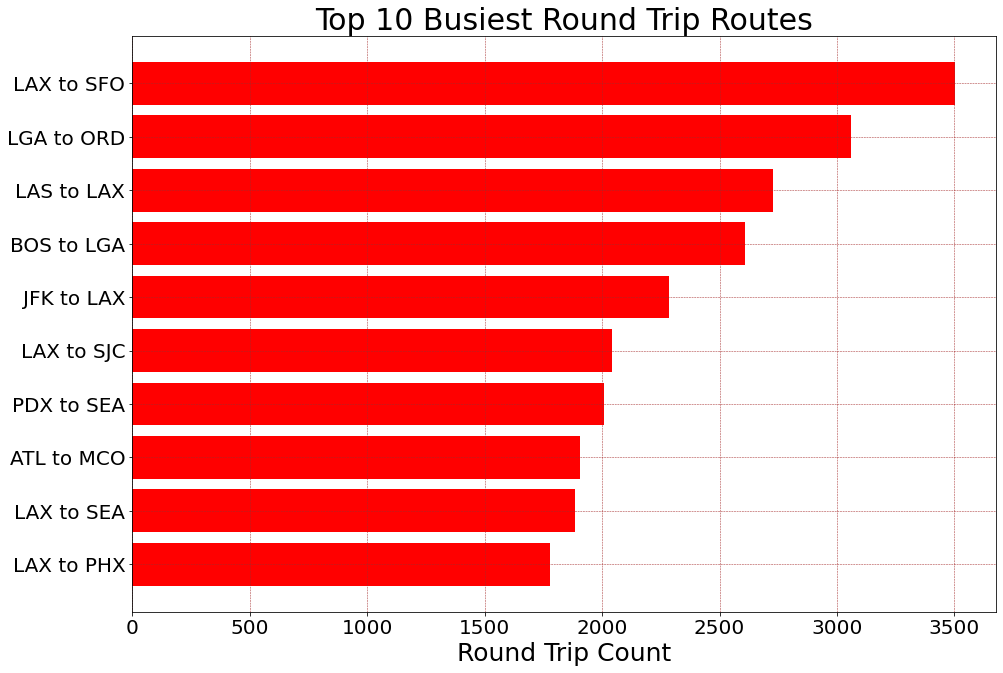

In [ ]:
# Here we create a separate table for top 10 busiest round trips
df_RoundTripBusiest = df_RoundTripSummary.sort_values(by = 'ROUNDTRIP_COUNT', ascending = False).head(10)
# Here we sort it for illustration purposes
df_RoundTripBusiest = df_RoundTripBusiest.sort_values(by = 'ROUNDTRIP_COUNT', ascending = True)

# Now let's plot Top 10 Busiest 10 Round Trips
fig = plt.figure(figsize=(12,8))
ax = fig.add_axes([0,0,1,1])
ax.barh( y = df_RoundTripBusiest['ROUND_TRIP'], width = df_RoundTripBusiest['ROUNDTRIP_COUNT'], color = 'r')
ax.set_title("Top 10 Busiest Round Trip Routes", fontsize=30)
# Let's set y label and ticker fonts
#plt.ylabel('Round Trip Route', fontsize=25)
plt.xlabel('Round Trip Count', fontsize=25)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
plt.grid(color = 'brown', linestyle = '--', linewidth = 0.5)
plt.show()

# **4. Top 10 Most profitable round trip routes**

## 4.1 Reorganization of Tickets Data Table
 - Assign Round Trip to each row in Tickets Data Table aligned with Flight Summary Table
 - Detect outliers for **ITIN_FARE**
 - Remove extreme **ITIN_FARE** prices
 - Remove **PASSENGER** > 200 as planes have 200 capacity
 - Impute **ITIN_FARE** column based on mean ITIN_FARE for each **ROUND_TRIP**


In [ ]:
# Here we assign the round trips based on the alphabetical order of ORIGIN and DESTINATION to ensure the consistency between flights and tickets
def RoundTripOrder(df):
  conditions = [
    (df['ORIGIN'] < df['DESTINATION']),
    (df['ORIGIN'] > df['DESTINATION'])
  ]

  #define results
  results = [df_Tickets_1Q2019['ORIGIN'] + ' to ' + df_Tickets_1Q2019['DESTINATION'], df_Tickets_1Q2019['DESTINATION'] + ' to ' + df_Tickets_1Q2019['ORIGIN']]
  return np.select(conditions, results)

In [ ]:
# Here we add another column to group round trips based on their origin and destination
df_Tickets_1Q2019['ROUND_TRIP'] =RoundTripOrder(df_Tickets_1Q2019)   # Here we get the ROUND TRIP column aligned with the flight table
# Here we list columns to be used in the rest of the analysis
cols = ['ITIN_ID', 'ORIGIN', 'PASSENGERS', 'ITIN_FARE', 'REPORTING_CARRIER', 'DESTINATION', 'ROUND_TRIP']
df_Tickets_1Q2019 = df_Tickets_1Q2019[cols]                # Here we
df_Tickets_1Q2019['PASSENGERS'] = pd.to_numeric(df_Tickets_1Q2019['PASSENGERS'], errors='coerce')    # Here we convert it Passenger Count to Numeric Value in case it is labelled differently
df_Tickets_1Q2019['ITIN_FARE'] = pd.to_numeric(df_Tickets_1Q2019['ITIN_FARE'], errors='coerce')      # Here we convert it ITIN FARE to Numeric Value in case it is labelled differently
# Data availablity summary in Unique Tickets Data Table for Q1 2019
print("Total number of rows in Round Trip Tickets Data Table: ", df_Tickets_1Q2019.shape[0], "\n Number of rows with missing data in Tickets Data Table:  ", df_Tickets_1Q2019.shape[0] - df_Tickets_1Q2019.dropna().shape[0])
print("\n Missing Data Entries at each column of Round Trip Tickets Data Table \n", df_Tickets_1Q2019.isnull().sum())


Total number of rows in Round Trip Tickets Data Table:  688502 
 Number of rows with missing data in Tickets Data Table:   3563

 Missing Data Entries at each column of Round Trip Tickets Data Table 
 ITIN_ID                 0
ORIGIN                  0
PASSENGERS           1434
ITIN_FARE            2146
REPORTING_CARRIER       1
DESTINATION             7
ROUND_TRIP              0
dtype: int64


In [ ]:
# Here we perform data imputation using the following columns for each Carrier and Round Trip Route
columns = ['ITIN_FARE', 'PASSENGERS']

# Here we create the mean of raw tickets table to validate the data imputation
df_TicketsRawMean = df_Tickets_1Q2019.groupby(['ORIGIN','DESTINATION'] ).agg(ITIN_FARE =('ITIN_FARE', 'mean'),PASSENGERS =('PASSENGERS', 'mean')).reset_index()

# Here we impute data for each Passengers, ORIGIN, and DESTINATION
df_Tickets_1Q2019[columns] = df_Tickets_1Q2019[columns].fillna(df_Tickets_1Q2019.groupby(['ORIGIN','DESTINATION'])[columns].transform('mean'))

# Here we create the mean of imputed tickets table to validate the data imputation
df_TicketsImputedMean = df_Tickets_1Q2019.groupby(['ORIGIN','DESTINATION'] ).agg(  ITIN_FARE =('ITIN_FARE', 'mean'),PASSENGERS =('PASSENGERS', 'mean')).reset_index()

# Data availability in Round Trip Tickets Data Table for Q1 2019
print("Total number of rows in Round Trip Tickets Q1 2019 Data Table: ", df_Tickets_1Q2019.shape[0], "\n Number of rows with missing data in Round Trip Tickets Q1 2019 Data Table:  ", df_Tickets_1Q2019.shape[0] - df_Tickets_1Q2019.dropna().shape[0])
print("\n Missing Data Entries at each column of Round Trip Tickets Q1 2019 Data Table \n", df_Tickets_1Q2019.isnull().sum())

Total number of rows in Round Trip Tickets Q1 2019 Data Table:  688502 
 Number of rows with missing data in Round Trip Tickets Q1 2019 Data Table:   124

 Missing Data Entries at each column of Round Trip Tickets Q1 2019 Data Table 
 ITIN_ID               0
ORIGIN                0
PASSENGERS           54
ITIN_FARE            64
REPORTING_CARRIER     1
DESTINATION           7
ROUND_TRIP            0
dtype: int64


In [ ]:
# Here we join df_TicketsRawMean and df_TicketsImputedMean compare summary statitics of them
df_TicketsImputationCheck = pd.merge(df_TicketsRawMean , df_TicketsImputedMean , on=['ORIGIN','DESTINATION'], how='outer')
df_TicketsImputationCheck.describe()

,ITIN_FARE_x,PASSENGERS_x,ITIN_FARE_y,PASSENGERS_y
count,34993.000000,34993.000000,34993.000000,34993.000000
mean,541.079699,1.179789,541.079699,1.179789
std,286.559525,0.670499,286.559525,0.670499
min,0.000000,1.000000,0.000000,1.000000
25%,389.500000,1.000000,389.500000,1.000000
50%,493.941176,1.000000,493.941176,1.000000
75%,629.000000,1.000000,629.000000,1.000000
max,9794.750000,28.500000,9794.750000,28.500000


In [ ]:
df_Tickets_1Q2019 = df_Tickets_1Q2019.dropna()
# Data availability in Round Trip Tickets Data Table for Q1 2019
print("Total number of rows in Round Trip Tickets Q1 2019 Data Table: ", df_Tickets_1Q2019.shape[0], "\n Number of rows with missing data in Round Trip Tickets Q1 2019 Data Table:  ", df_Tickets_1Q2019.shape[0] - df_Tickets_1Q2019.dropna().shape[0])
print("\n Missing Data Entries at each column of Round Trip Tickets Q1 2019 Data Table \n", df_Tickets_1Q2019.isnull().sum())

Total number of rows in Round Trip Tickets Q1 2019 Data Table:  688378 
 Number of rows with missing data in Round Trip Tickets Q1 2019 Data Table:   0

 Missing Data Entries at each column of Round Trip Tickets Q1 2019 Data Table 
 ITIN_ID              0
ORIGIN               0
PASSENGERS           0
ITIN_FARE            0
REPORTING_CARRIER    0
DESTINATION          0
ROUND_TRIP           0
dtype: int64


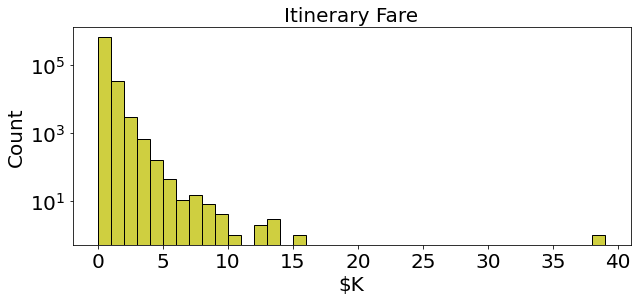

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,4))
sns.histplot(df_Tickets_1Q2019['ITIN_FARE']/1000,  color='y', binwidth=1) # Here we use 50 minutes as bin size
ax.set_title("Itinerary Fare", fontsize=20)
ax.set_yscale('log')                                                        # We set it to logartihmic scale to easily identify outliers
ax.set(xlabel=None)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.set_xlabel('$K')
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)

In [ ]:
# Since each plane has 200 capacity, we exclude these data points from df_Tickets_1Q2019 data table
# Differing from PASSENGERS, Even though ITIN_FARE has some relatively high values, these values are still within possible bounds
df_Tickets_1Q2019 = df_Tickets_1Q2019[df_Tickets_1Q2019['PASSENGERS'] <= 200]    # Here we limit our data table to the itineraries with less than 200 passenges
 # Here we limit our data table to ITIN_FARE with less than $20K as anything above is a singular event, which may interfere with our analysis
df_Tickets_1Q2019 = df_Tickets_1Q2019[df_Tickets_1Q2019['ITIN_FARE'] <= 20000]

# Data availablity summary in Filtered Unique Tickets Data Table for Q1 2019
print("Filtered row count in Round Trip Tickets Data Table: ", df_Tickets_1Q2019.shape[0], "\n Number of rows with missing data in Tickets Data Table:  ", df_Tickets_1Q2019.shape[0] - df_Tickets_1Q2019.dropna().shape[0])
print("\n Missing Data Entries at each column of Round Trip Tickets Data Table \n", df_Tickets_1Q2019.isnull().sum())
df_Tickets_1Q2019.describe()

Filtered row count in Round Trip Tickets Data Table:  688320 
 Number of rows with missing data in Tickets Data Table:   0

 Missing Data Entries at each column of Round Trip Tickets Data Table 
 ITIN_ID              0
ORIGIN               0
PASSENGERS           0
ITIN_FARE            0
REPORTING_CARRIER    0
DESTINATION          0
ROUND_TRIP           0
dtype: int64


,PASSENGERS,ITIN_FARE
count,688320.000000,688320.000000
mean,1.929221,473.812715
std,4.298677,340.119867
min,1.000000,0.000000
25%,1.000000,280.000000
50%,1.000000,417.000000
75%,1.000000,596.000000
max,198.000000,15365.000000


In [ ]:
# Here we drop rows with NA Destination entry as we have only few
df_Tickets_1Q2019 = df_Tickets_1Q2019.dropna()
# Here we calculate the volume of Passengers and Total Fare collected for each Round Trip Route
df_TicketsSummary = df_Tickets_1Q2019.groupby(['ROUND_TRIP']).agg( TOTAL_PASSENGERS =('PASSENGERS', 'sum'),  AVG_ITIN_FARE =('ITIN_FARE', 'mean'), UNIQUE_ITIN	 = ('ITIN_ID', 'nunique')).reset_index()
# Here we order df_TicketsSummary by ITIN_COUNT to see the availability of data points
df_TicketsSummary.describe()

,TOTAL_PASSENGERS,AVG_ITIN_FARE,UNIQUE_ITIN
count,24089.000000,24089.000000,24089.000000
mean,55.125637,555.234716,24.039520
std,238.904920,284.601498,71.457438
min,1.000000,0.000000,1.000000
25%,2.000000,404.000000,2.000000
50%,5.000000,504.086957,4.000000
75%,17.000000,639.000000,14.000000
max,7357.918605,6055.000000,1426.000000


## 4.2  Join Reorganized Tickets table with Round Trip Summary Table
- Join Flight Summary Table and Tickets Summary Table on **ROUND_TRIP**
- Drop unused columns
- Drop rows with missing data points

In [ ]:
 # Here we merge Round Trip Summary with Tickets Summary on Round Trip column
df_FlightSummary = pd.merge(df_RoundTripSummary, df_TicketsSummary, on=['ROUND_TRIP'], how='left')
print("Total number of rows in Airport Codes Data Table: ",df_FlightSummary.shape[0], "\n Number of rows with missing data in Tickets Data Table:  ", df_FlightSummary.shape[0] - df_FlightSummary.dropna().shape[0])
print("\n Missing Data Entries at each column of Airport Codes Data Table \n", df_FlightSummary.isnull().sum())
# We don't use them in the rest of the calculations, instead we will use OCCUPANCY_RATE and Capacity for the number of passengers
df_FlightSummary = df_FlightSummary.drop(['TOTAL_PASSENGERS','UNIQUE_ITIN'],axis=1)
df_FlightSummary = df_FlightSummary.dropna()
df_FlightSummary.head(30)

Total number of rows in Airport Codes Data Table:  2834 
 Number of rows with missing data in Tickets Data Table:   36

 Missing Data Entries at each column of Airport Codes Data Table 
 ROUND_TRIP           0
ORIGIN               0
DESTINATION          0
ROUNDTRIP_COUNT      0
DISTANCE             0
POS_DELAY            0
EXC_DELAY            0
OCCUPANCY_RATE       0
ORIGIN_SIZE          0
DESTINATION_SIZE     0
TOTAL_PASSENGERS    36
AVG_ITIN_FARE       36
UNIQUE_ITIN         36
dtype: int64


,ROUND_TRIP,ORIGIN,DESTINATION,ROUNDTRIP_COUNT,DISTANCE,POS_DELAY,EXC_DELAY,OCCUPANCY_RATE,ORIGIN_SIZE,DESTINATION_SIZE,AVG_ITIN_FARE
0,ABE to ATL,ABE,ATL,130.0,692.0,15.690918,10.411198,0.644470,medium_airport,large_airport,618.764706
1,ABE to CLT,ABE,CLT,269.0,481.0,17.562916,10.780515,0.664819,medium_airport,large_airport,426.222222
2,ABE to DTW,ABE,DTW,217.0,425.0,17.394314,13.648159,0.659425,medium_airport,large_airport,413.076923
3,ABE to FLL,ABE,FLL,16.0,1041.0,27.612132,21.406250,0.603438,medium_airport,large_airport,188.875000
4,ABE to ORD,ABE,ORD,61.0,654.0,43.788078,35.095676,0.664610,medium_airport,large_airport,611.272727
6,ABE to PIE,ABE,PIE,30.0,970.0,4.488889,1.991667,0.643611,medium_airport,medium_airport,220.000000
7,ABE to SFB,ABE,SFB,101.0,882.0,21.138614,14.584158,0.677822,medium_airport,large_airport,174.754464
8,ABI to DFW,ABI,DFW,500.0,158.0,20.121388,12.637819,0.650296,medium_airport,large_airport,397.448276
9,ABQ to ATL,ABQ,ATL,119.0,1269.0,11.180847,4.994363,0.664114,large_airport,large_airport,579.054545
10,ABQ to AUS,ABQ,AUS,58.0,619.0,13.950694,9.844444,0.640410,large_airport,large_airport,329.914286


## 4.3 Profitability Metrics
- **Revenue Drivers**:
  - $\text{Total baggage fee} = 2 \times 200 \times \text{Occupancy Rate} \times 50\% \times \text{Baggage fee}$
  - $\text{Total Fare} = 200 \times \text{Occupancy Rate} \times \text{Average ITIN Fare}$
- **Cost Drivers**:
  - $\text{Operational Cost} = 2 \times \text{Distance} \times \$ 8$
  - $\text{Depreciation Cost} = 2 \times \text{Distance} \times \$ 1.18$
  - $\text{Airport Operation Cost} = 2 \times (\text{Origin Airport Cost} + \text{Destination Airport Cost} )$
  - $\text{Delay Cost} = 2 \times \text{Excess Delay} \times  \$ 75$

Note that we have a separate function to calculate Airport Operational Cost, which automatically checks Airport Size and assigns the predefined cost for each round trip

In [ ]:
# Here we calculate the Airport Operational Cost for both arrival and departure
def AirportCost(df):
  conditions = [
    (df['ORIGIN_SIZE'] == 'large_airport') & (df['DESTINATION_SIZE'] == 'large_airport'),
    (df['ORIGIN_SIZE'] == 'medium_airport') & (df['DESTINATION_SIZE'] == 'large_airport'),
    (df['ORIGIN_SIZE'] == 'large_airport') & (df['DESTINATION_SIZE'] == 'medium_airport'),
    (df['ORIGIN_SIZE'] == 'medium_airport') & (df['DESTINATION_SIZE'] == 'medium_airport')
  ]

  #define results
  results = [ LargeAirportCost+ LargeAirportCost, LargeAirportCost+MediumAirportCost,  LargeAirportCost+MediumAirportCost, MediumAirportCost+MediumAirportCost]
  return np.select(conditions, results)

In [ ]:
# Revenue Calculations
df_FlightSummary['BAGGAGE_FEE'] = df_FlightSummary['OCCUPANCY_RATE'] * BagFee * BagRate * Capacity * 2 # Here we multiply it with 2 to include both flights in a round trip
df_FlightSummary['FLIGHT_FARE'] = df_FlightSummary['OCCUPANCY_RATE'] * df_FlightSummary['AVG_ITIN_FARE'] * Capacity

# Cost Calculations
df_FlightSummary['OPERATIONAL_COST'] = df_FlightSummary['DISTANCE'] * OperationalCost * 2                       # Operational Cost:
df_FlightSummary['DEPRC_COST'] = df_FlightSummary['DISTANCE'] * DepreciationCost  * 2                           # Depreciation Cost
df_FlightSummary['AIRPORT_COST']  = AirportCost(df_FlightSummary) *2                                            # Airport Cost
df_FlightSummary['DELAY_COST'] = df_FlightSummary['EXC_DELAY'] * DelayCost * 2                                  # Delay Cost

# Positive Delay is also multiplied with 2 to take Forward and Backward Flights sum into account even though it is not used in profitability calculations
df_FlightSummary['POS_DELAY'] = df_FlightSummary['POS_DELAY'] * 2

# Profit Calculation
df_FlightSummary['TOTAL_REVENUE'] = (df_FlightSummary['BAGGAGE_FEE'] + df_FlightSummary['FLIGHT_FARE'] ) * df_FlightSummary['ROUNDTRIP_COUNT']
df_FlightSummary['TOTAL_COST'] = (df_FlightSummary['OPERATIONAL_COST'] + df_FlightSummary['DEPRC_COST'] + df_FlightSummary['AIRPORT_COST'] + df_FlightSummary['DELAY_COST'] ) * df_FlightSummary['ROUNDTRIP_COUNT']
# Per flight profit
df_FlightSummary['PER_ROUNDTRIP_PROFIT'] = df_FlightSummary['FLIGHT_FARE'] + df_FlightSummary['BAGGAGE_FEE'] - df_FlightSummary['OPERATIONAL_COST'] - df_FlightSummary['DEPRC_COST'] - df_FlightSummary['AIRPORT_COST'] - df_FlightSummary['DELAY_COST']
# Total profit in Q1 2019
df_FlightSummary['TOTAL_PROFIT'] =df_FlightSummary['TOTAL_REVENUE'] - df_FlightSummary['TOTAL_COST']
# Here we drop columns that are not used in the rest of the analysis
df_FlightSummary = df_FlightSummary.drop(['ORIGIN_SIZE', 'DESTINATION_SIZE','ORIGIN', 'DESTINATION'],axis=1)

# Data availability in Round Trip Tickets Data Table for Q1 2019
print("Total number of rows in Round Trip Flight Summary Data Table: ", df_FlightSummary.shape[0], "\n Number of rows with missing data in Round Trip Flight Summary Data Table:  ", df_FlightSummary.shape[0] - df_FlightSummary.dropna().shape[0])
print("\n Missing Data Entries at each column of Round Trip Flight Summary Data Table \n", df_FlightSummary.isnull().sum())

Total number of rows in Round Trip Flight Summary Data Table:  2798 
 Number of rows with missing data in Round Trip Flight Summary Data Table:   0

 Missing Data Entries at each column of Round Trip Flight Summary Data Table 
 ROUND_TRIP              0
ROUNDTRIP_COUNT         0
DISTANCE                0
POS_DELAY               0
EXC_DELAY               0
OCCUPANCY_RATE          0
AVG_ITIN_FARE           0
BAGGAGE_FEE             0
FLIGHT_FARE             0
OPERATIONAL_COST        0
DEPRC_COST              0
AIRPORT_COST            0
DELAY_COST              0
TOTAL_REVENUE           0
TOTAL_COST              0
PER_ROUNDTRIP_PROFIT    0
TOTAL_PROFIT            0
dtype: int64


In [ ]:
# Here we create a separate table for Top 10 profitable round trips
df_TopFlights = df_FlightSummary.sort_values(by = 'TOTAL_PROFIT', ascending = False).head(10)
df_TopFlights.head()

,ROUND_TRIP,ROUNDTRIP_COUNT,DISTANCE,POS_DELAY,EXC_DELAY,OCCUPANCY_RATE,AVG_ITIN_FARE,BAGGAGE_FEE,FLIGHT_FARE,OPERATIONAL_COST,DEPRC_COST,AIRPORT_COST,DELAY_COST,TOTAL_REVENUE,TOTAL_COST,PER_ROUNDTRIP_PROFIT,TOTAL_PROFIT
2012,JFK to LAX,2286.0,2475.0,44.277832,15.429191,0.650946,961.575618,4556.623370,125186.798079,39600.0,5841.00,40000,2314.378723,2.965935e+08,2.006088e+08,41988.042727,9.598467e+07
1578,EWR to SFO,907.0,2565.0,94.253218,36.464126,0.642656,1066.319269,4498.593338,137055.335941,41040.0,6053.40,40000,5469.618860,1.283894e+08,8.395466e+07,48990.910420,4.443476e+07
841,CLT to FLO,180.0,99.0,37.933607,12.191576,0.644280,1999.000000,4509.957195,257582.983789,1584.0,233.64,30000,1828.736339,4.717673e+07,6.056348e+06,228446.564645,4.112038e+07
855,CLT to ILM,693.0,185.0,23.322832,6.613333,0.655499,630.000000,4588.491121,82592.840175,2960.0,436.60,30000,991.999956,6.041666e+07,2.383130e+07,52792.731340,3.658536e+07
2698,PIH to SLC,233.0,150.0,18.274678,5.886266,0.649485,1335.115385,4546.394850,173427.477385,2400.0,354.00,30000,882.939914,4.146791e+07,7.837407e+06,144336.932321,3.363051e+07


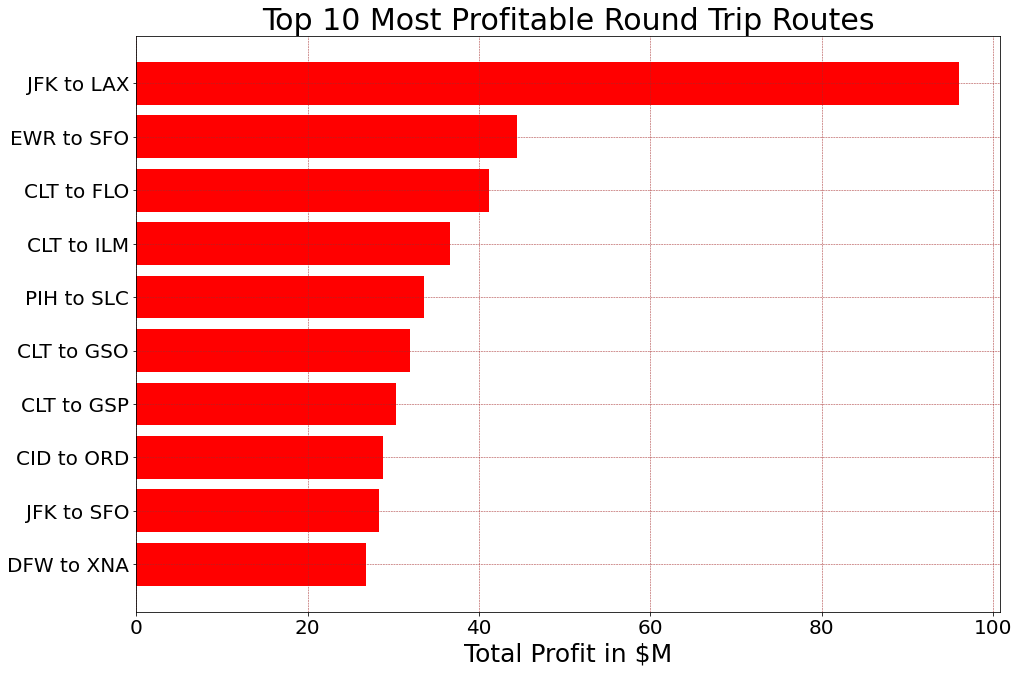

In [ ]:
# Here we reverse the order for the chart
df_TopFlights = df_TopFlights.sort_values(by = 'TOTAL_PROFIT', ascending = True)

# Now let's plot Top 10 Most Profitable Round Trips
fig = plt.figure(figsize=(12,8))
ax = fig.add_axes([0,0,1,1])
ax.barh( y = df_TopFlights['ROUND_TRIP'], width = df_TopFlights['TOTAL_PROFIT']/pow(10,6), color = 'r')
ax.set_title("Top 10 Most Profitable Round Trip Routes", fontsize=30)
# Let's set y label and ticker fonts
#plt.ylabel('Round Trip Route', fontsize=25)
plt.xlabel('Total Profit in $M', fontsize=25)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
plt.grid(color = 'brown', linestyle = '--', linewidth = 0.5)
plt.show()

# **5. Top 5 Investment Opportunities for Our Client**
The value proposition for our client is "On time, for you". Therefore, we need to restrict our attention to round trip routes with delay time significantly below the average. Yet, these round trip routes need to be still profitable with sufficient **Market Size**. Here, Market Size refers to # of round trips in Q1 2019.


In [ ]:
df_FlightSummary.describe()

,ROUNDTRIP_COUNT,DISTANCE,POS_DELAY,EXC_DELAY,OCCUPANCY_RATE,AVG_ITIN_FARE,BAGGAGE_FEE,FLIGHT_FARE,OPERATIONAL_COST,DEPRC_COST,AIRPORT_COST,DELAY_COST,TOTAL_REVENUE,TOTAL_COST,PER_ROUNDTRIP_PROFIT,TOTAL_PROFIT
count,2798.000000,2798.000000,2798.000000,2798.000000,2798.000000,2798.000000,2798.000000,2798.000000,2798.000000,2798.000000,2798.000000,2798.000000,2.798000e+03,2.798000e+03,2798.000000,2.798000e+03
mean,262.960686,903.390295,59.267443,21.764544,0.650279,430.397378,4551.953291,55993.751497,14454.244725,2132.001097,36726.233024,3264.681648,1.600151e+07,1.461391e+07,3968.544294,1.387601e+06
std,299.870091,637.859896,40.650822,18.640738,0.026913,150.052364,188.390318,19715.866876,10205.758340,1505.349355,5052.894847,2796.110626,1.819850e+07,1.720344e+07,18692.120896,5.514327e+06
min,1.000000,31.000000,0.000000,0.000000,0.440000,0.000000,3080.000000,0.000000,496.000000,73.160000,20000.000000,0.000000,2.287633e+04,4.303560e+04,-63501.594286,-3.269582e+07
25%,72.000000,445.000000,35.793590,10.971245,0.639587,342.369766,4477.105912,44568.206214,7120.000000,1050.200000,30000.000000,1645.686764,4.103752e+06,3.996252e+06,-8341.522634,-7.459492e+05
50%,169.000000,759.000000,50.577102,17.176382,0.650555,421.760013,4553.886338,54785.173898,12144.000000,1791.240000,40000.000000,2576.457271,1.050330e+07,9.353444e+06,2194.199172,1.827778e+05
75%,344.000000,1162.000000,71.981050,26.895031,0.660869,511.042857,4626.082753,66399.638399,18592.000000,2742.320000,40000.000000,4034.254642,2.170412e+07,1.872411e+07,15111.811645,2.800769e+06
max,3503.000000,4983.000000,734.289075,350.031566,0.930000,1999.000000,6510.000000,257582.983789,79728.000000,11759.880000,40000.000000,52504.734848,2.965935e+08,2.006088e+08,228446.564645,9.598467e+07


## 5.1 Filtering the round trip data

**Filtering Steps:**
- Remove exterme values in Positive Delay distributions
- Filter Round Trips Data to above average Total Profit in Q1 2019
- Filter Round Trips Data to above average Profit Per Flight in Q1 2019

**Note that filtering data to above average Total Profit will also ensure sufficient demand.**

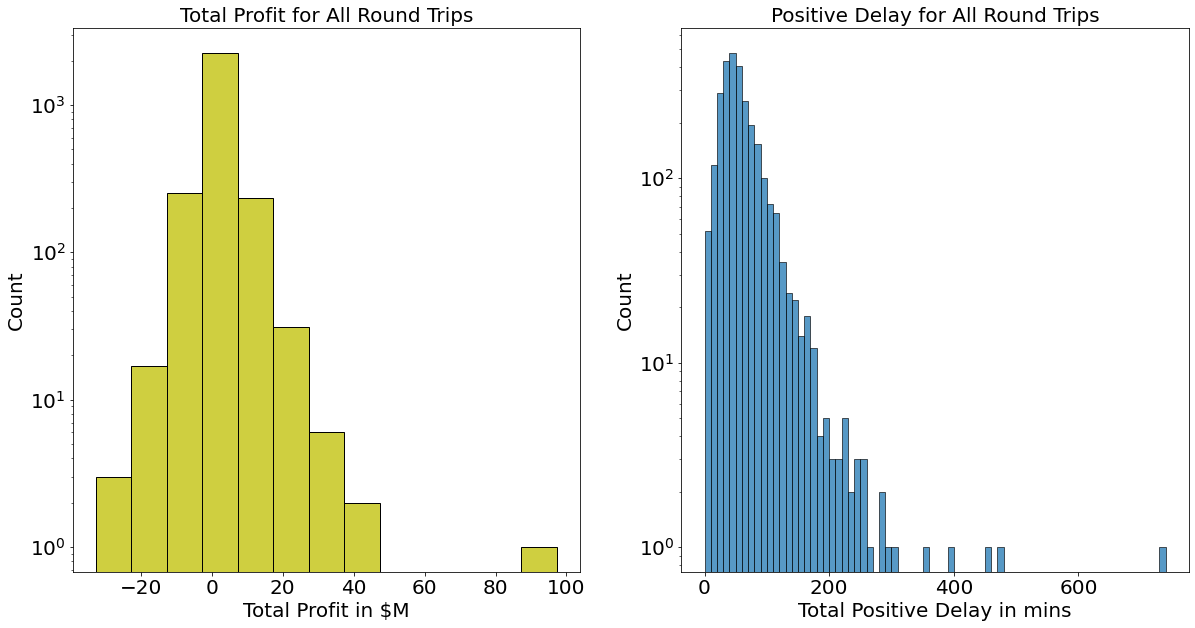

In [ ]:
# Logartihmic Histogram for delays to identify extremely high positive delays and

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
sns.histplot(df_FlightSummary['TOTAL_PROFIT'] / pow(10,6), ax=ax[0], color='y', binwidth=10 ) # Here we use 50 round trips as bin size
ax[0].set_title("Total Profit for All Round Trips", fontsize=20)
ax[0].set_yscale('log')                                                             # We set it to logartihmic scale to easily identify outliers
ax[0].set(xlabel=None)
ax[0].tick_params(axis='x', labelsize=20)
ax[0].tick_params(axis='y', labelsize=20)
ax[0].set_xlabel('Total Profit in $M')
ax[0].xaxis.label.set_size(20)
ax[0].yaxis.label.set_size(20)
sns.histplot(df_FlightSummary['POS_DELAY'], ax=ax[1], binwidth=10)            # Here we use 10 minuts as bin size
ax[1].set_title("Positive Delay for All Round Trips", fontsize=20)
ax[1].set_yscale('log')                                                        # We set it to logartihmic scale to easily identify outliers
ax[1].set(xlabel=None)
ax[1].tick_params(axis='x', labelsize=20)
ax[1].tick_params(axis='y', labelsize=20)
ax[1].set_xlabel('Total Positive Delay in mins')
ax[1].xaxis.label.set_size(20)
ax[1].yaxis.label.set_size(20)
plt.show()

In [ ]:
# Here we limit our data to Positive Delays less than 100, which interferes with standard deviation calculations
df_FlightSummary = df_FlightSummary[df_FlightSummary['POS_DELAY'] < df_FlightSummary['POS_DELAY'].mean()]
# Here we also want to restrict our attention to the round trip routes with above average total profit so that we will have enough demand and profit per flight
df_FlightSummary = df_FlightSummary[df_FlightSummary['TOTAL_PROFIT'] > df_FlightSummary['TOTAL_PROFIT'].mean()]
# Here we also want to restrict our attention to the round trip routes with above average total profit so that we will have enough demand and profit per flight
df_FlightSummary = df_FlightSummary[df_FlightSummary['PER_ROUNDTRIP_PROFIT'] > df_FlightSummary['PER_ROUNDTRIP_PROFIT'].mean()]
# Data availability in Round Trip Tickets Data Table for Q1 2019
print("Total number of rows in Round Trip Flight Summary Data Table: ", df_FlightSummary.shape[0], "\n Number of rows with missing data in Round Trip Flight Summary Data Table:  ", df_FlightSummary.shape[0] - df_FlightSummary.dropna().shape[0])
print("\n Missing Data Entries at each column of Round Trip Flight Summary Data Table \n", df_FlightSummary.isnull().sum())

df_FlightSummary['POS_DELAY'].describe()

Total number of rows in Round Trip Flight Summary Data Table:  263 
 Number of rows with missing data in Round Trip Flight Summary Data Table:   0

 Missing Data Entries at each column of Round Trip Flight Summary Data Table 
 ROUND_TRIP              0
ROUNDTRIP_COUNT         0
DISTANCE                0
POS_DELAY               0
EXC_DELAY               0
OCCUPANCY_RATE          0
AVG_ITIN_FARE           0
BAGGAGE_FEE             0
FLIGHT_FARE             0
OPERATIONAL_COST        0
DEPRC_COST              0
AIRPORT_COST            0
DELAY_COST              0
TOTAL_REVENUE           0
TOTAL_COST              0
PER_ROUNDTRIP_PROFIT    0
TOTAL_PROFIT            0
dtype: int64


count    263.000000
mean      37.871009
std       12.186384
min        4.085469
25%       28.891222
50%       38.235821
75%       47.696024
max       58.806654
Name: POS_DELAY, dtype: float64

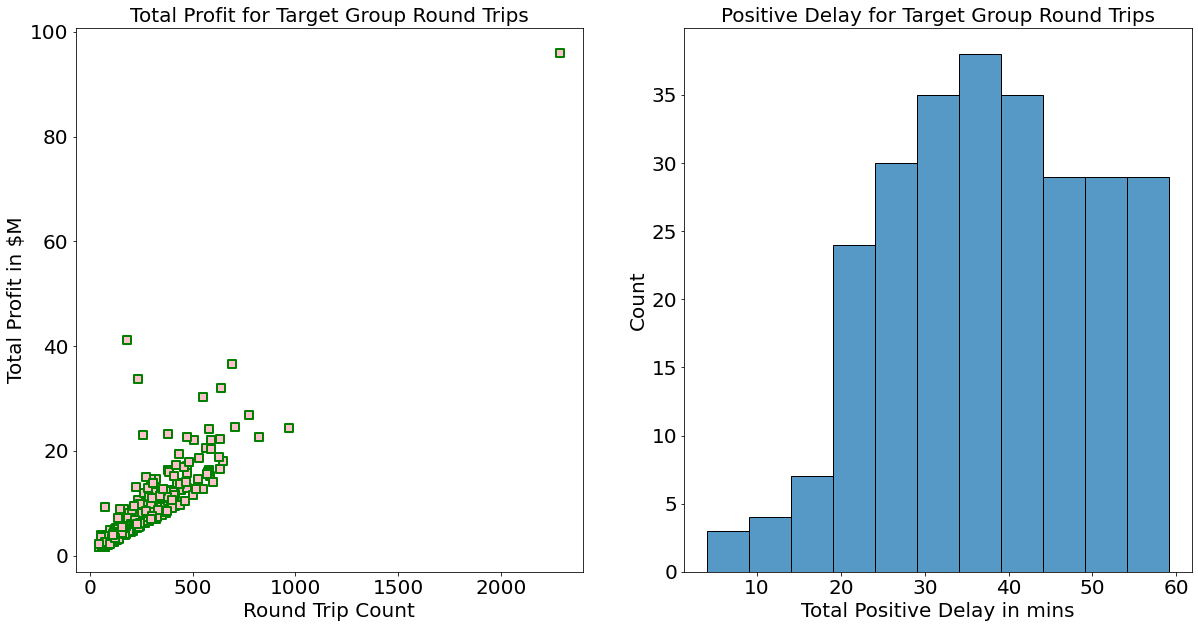

In [ ]:
# Logartihmic Histogram for delays to identify extremely high positive delays and
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
ax[0].scatter(df_FlightSummary['ROUNDTRIP_COUNT'], df_FlightSummary['TOTAL_PROFIT']/pow(10,6),  c ="pink",
            linewidths = 2,
            marker ="s",
            edgecolor ="green",
            s = 50)
ax[0].set_title("Total Profit for Target Group Round Trips", fontsize=20)
ax[0].set(xlabel=None)
ax[0].tick_params(axis='x', labelsize=20)
ax[0].tick_params(axis='y', labelsize=20)
ax[0].set_ylabel('Total Profit in $M')
ax[0].set_xlabel('Round Trip Count')
ax[0].xaxis.label.set_size(20)
ax[0].yaxis.label.set_size(20)
sns.histplot(df_FlightSummary['POS_DELAY'], ax=ax[1], binwidth= 5)            # Here we use 10 minuts as bin size
ax[1].set_title("Positive Delay for Target Group Round Trips", fontsize=20)
ax[1].set(xlabel=None)
ax[1].tick_params(axis='x', labelsize=20)
ax[1].tick_params(axis='y', labelsize=20)
ax[1].set_xlabel('Total Positive Delay in mins')
ax[1].xaxis.label.set_size(20)
ax[1].yaxis.label.set_size(20)
plt.show()

## 5.2 Identifying round trips with significantly low total delays with the highest profitability

- Idendify Round Trips with Positive Delay $\sigma$ less than the average  in Filtered Round Trip data
- Pull Top 5 Round Trips with the **highest profit per flight** in the previous step

Note that we already restricted our round trip data to above average market size, so we focus on round trips where we can have more market share. As a result, we recommend focusing on profit per flight with relatively less competition.



In [ ]:
# This function returns a list of index values for the round trip routes with 1 standard deviation below Excess Delay Time for
def get_LeastDelayRoundTrips(data, columns):
    # we create an empty list
    outlier_idxs = []
    # Number of standard deviations we keep.
    nsd = 1
    for col in columns:
        elements = data[col]
        # we get the mean value for each column
        mean = elements.mean()
        # and the standard deviation of the column
        sd = elements.std()
        # we then get the index values of all values lower than the mean - nsd standard deviations for Positive Delays in Flights
        outliers_mask = data[(data[col]  < mean  - nsd*sd)].index
        # and add those index values to our list
        outlier_idxs  += [x for x in outliers_mask]
    return list(set(outlier_idxs))

In [ ]:
# Here we check Occupancy Rate distributions to find out which routes are most preferred
col_name = ['POS_DELAY']
ontime_idx = get_LeastDelayRoundTrips(df_FlightSummary, col_name)
df_FlightsOnTime = df_FlightSummary.loc[ontime_idx]                 # Here we get flights with one standard deviation below excess time

# We need to invest on Top 5 most profitable routes per flight among the round trip routes with the excess delay time one standard deviation of the average
df_FlightInvestment = df_FlightsOnTime.sort_values(by = 'TOTAL_PROFIT', ascending = False).head(5)
df_FlightInvestment.head(5)


,ROUND_TRIP,ROUNDTRIP_COUNT,DISTANCE,POS_DELAY,EXC_DELAY,OCCUPANCY_RATE,AVG_ITIN_FARE,BAGGAGE_FEE,FLIGHT_FARE,OPERATIONAL_COST,DEPRC_COST,AIRPORT_COST,DELAY_COST,TOTAL_REVENUE,TOTAL_COST,PER_ROUNDTRIP_PROFIT,TOTAL_PROFIT
855,CLT to ILM,693.0,185.0,23.322832,6.613333,0.655499,630.000000,4588.491121,82592.840175,2960.0,436.60,30000,991.999956,6.041666e+07,2.383130e+07,52792.731340,3.658536e+07
2698,PIH to SLC,233.0,150.0,18.274678,5.886266,0.649485,1335.115385,4546.394850,173427.477385,2400.0,354.00,30000,882.939914,4.146791e+07,7.837407e+06,144336.932321,3.363051e+07
1394,DFW to XNA,774.0,280.0,25.409167,7.355542,0.647570,512.611702,4532.991821,66390.418657,4480.0,660.80,30000,1103.331303,5.489472e+07,2.805296e+07,34679.279175,2.684176e+07
191,ATL to MEM,633.0,332.0,22.648681,6.375083,0.652295,594.225000,4566.061543,77521.940577,5312.0,783.52,40000,956.262511,5.196171e+07,2.978378e+07,35036.219609,2.217793e+07
231,ATL to SAV,591.0,214.0,21.765690,6.206251,0.647056,601.396825,4529.393541,77827.511335,3424.0,505.04,40000,930.937683,4.867293e+07,2.651225e+07,37496.927193,2.216068e+07


<ipython-input-43-5bb6fa18c207>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


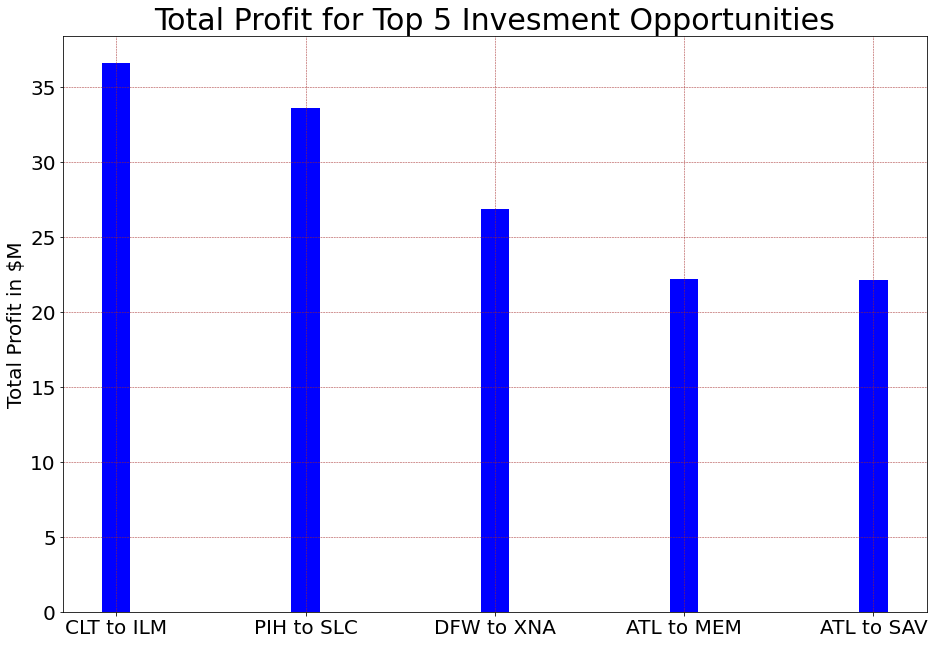

In [ ]:
# Here we plot top Round Trip Destinations with Top Profit
fig = plt.figure(figsize=(12,8))
ax = fig.add_axes([0,0,1,1])
ax.bar(df_FlightInvestment['ROUND_TRIP'], df_FlightInvestment['TOTAL_PROFIT']/pow(10,6), color = 'b', width = 0.15)
ax.set_title("Total Profit for Top 5 Invesment Opportunities", fontsize=30)
# Let's set y label and ticker fonts
plt.ylabel('Total Profit in \$M', fontsize=20)
plt.tick_params(axis='y', which='major', labelsize=20)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
# let's set tickers to integer
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
#set tick labels font size for x-axis only
# plt.xlabel('Round Trip', fontsize=15)
plt.tick_params(axis='x', which='major', labelsize=20)
plt.grid(color = 'brown', linestyle = '--', linewidth = 0.5)
plt.show()

<ipython-input-44-9f3f1ff34358>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


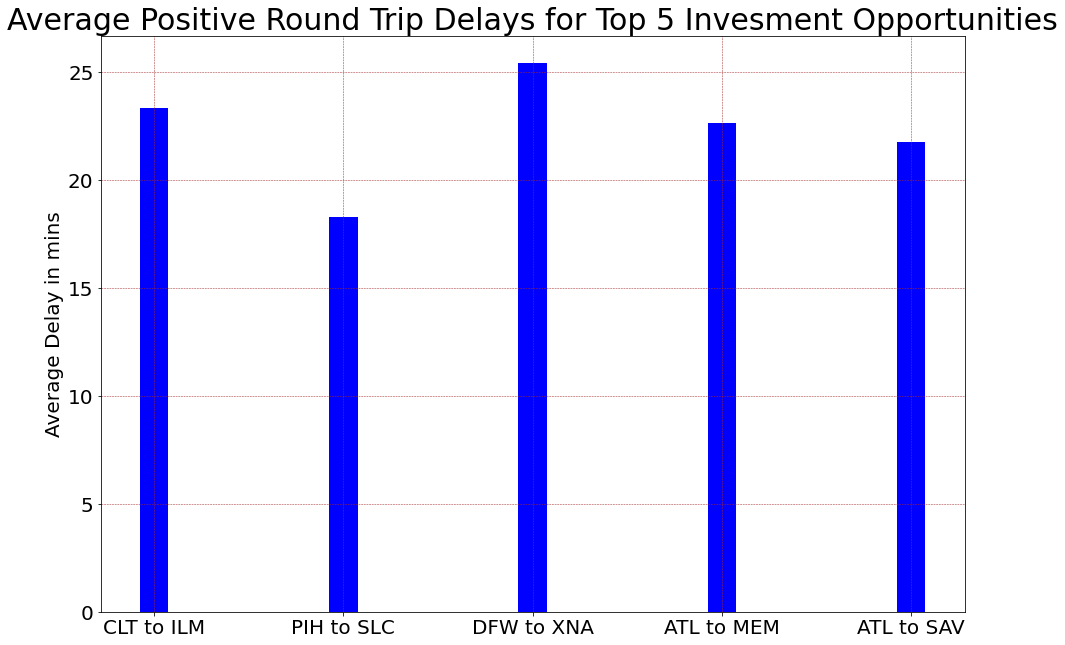

In [ ]:
# Here we plot top Round Trip Destinations with Top Profit
fig = plt.figure(figsize=(12,8))
ax = fig.add_axes([0,0,1,1])
ax.bar(df_FlightInvestment['ROUND_TRIP'], df_FlightInvestment['POS_DELAY'], color = 'b', width = 0.15)
ax.set_title("Average Positive Round Trip Delays for Top 5 Invesment Opportunities", fontsize=30)
# Let's set y label and ticker fonts
plt.ylabel('Average Delay in mins', fontsize=20)
plt.tick_params(axis='y', which='major', labelsize=20)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
# let's set tickers to integer
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
#set tick labels font size for x-axis only
# plt.xlabel('Round Trip', fontsize=15)
plt.tick_params(axis='x', which='major', labelsize=10)
plt.tick_params(axis='x', which='major', labelsize=20)
plt.grid(color = 'brown', linestyle = '--', linewidth = 0.5)
plt.show()

## 5.3 Breakeven calculation

In [ ]:
# Break Even Calculation for each Round Trip route that we recommend to invest
df_FlightInvestment['BREAKEVEN_COUNT'] = np.ceil(AirplaneCost/df_FlightsOnTime['PER_ROUNDTRIP_PROFIT'])
df_FlightInvestment.sort_values(by = 'TOTAL_PROFIT', ascending = False)

,ROUND_TRIP,ROUNDTRIP_COUNT,DISTANCE,POS_DELAY,EXC_DELAY,OCCUPANCY_RATE,AVG_ITIN_FARE,BAGGAGE_FEE,FLIGHT_FARE,OPERATIONAL_COST,DEPRC_COST,AIRPORT_COST,DELAY_COST,TOTAL_REVENUE,TOTAL_COST,PER_ROUNDTRIP_PROFIT,TOTAL_PROFIT,BREAKEVEN_COUNT
855,CLT to ILM,693.0,185.0,23.322832,6.613333,0.655499,630.000000,4588.491121,82592.840175,2960.0,436.60,30000,991.999956,6.041666e+07,2.383130e+07,52792.731340,3.658536e+07,1705.0
2698,PIH to SLC,233.0,150.0,18.274678,5.886266,0.649485,1335.115385,4546.394850,173427.477385,2400.0,354.00,30000,882.939914,4.146791e+07,7.837407e+06,144336.932321,3.363051e+07,624.0
1394,DFW to XNA,774.0,280.0,25.409167,7.355542,0.647570,512.611702,4532.991821,66390.418657,4480.0,660.80,30000,1103.331303,5.489472e+07,2.805296e+07,34679.279175,2.684176e+07,2596.0
191,ATL to MEM,633.0,332.0,22.648681,6.375083,0.652295,594.225000,4566.061543,77521.940577,5312.0,783.52,40000,956.262511,5.196171e+07,2.978378e+07,35036.219609,2.217793e+07,2569.0
231,ATL to SAV,591.0,214.0,21.765690,6.206251,0.647056,601.396825,4529.393541,77827.511335,3424.0,505.04,40000,930.937683,4.867293e+07,2.651225e+07,37496.927193,2.216068e+07,2401.0


<ipython-input-303-5f9df4c76525>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


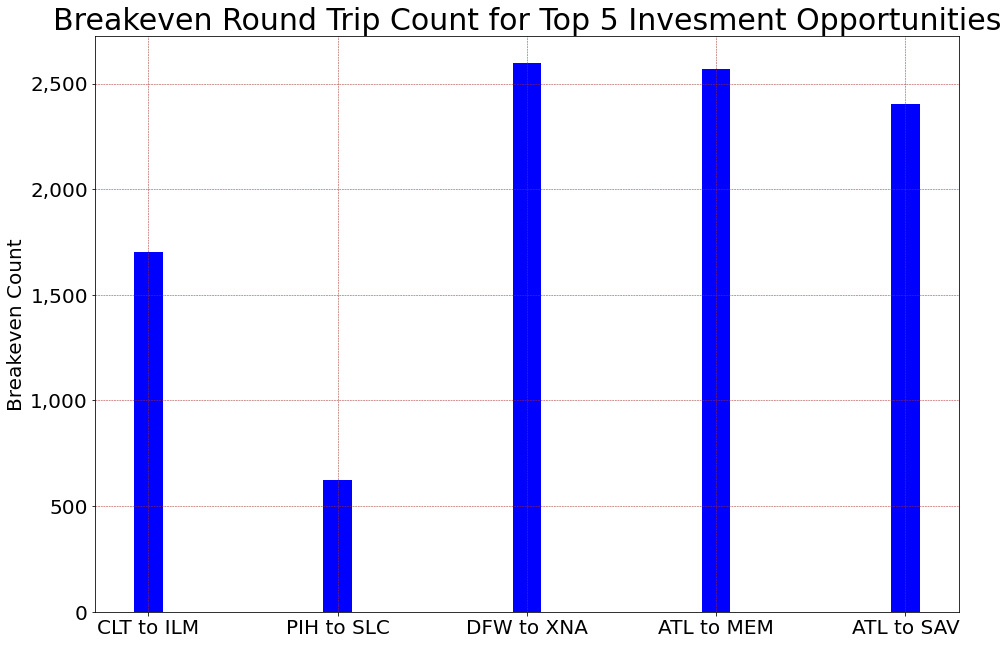

In [ ]:
# Here we plot top Round Trip Destinations with Top Profit
fig = plt.figure(figsize=(12,8))
ax = fig.add_axes([0,0,1,1])
ax.bar(df_FlightInvestment['ROUND_TRIP'], df_FlightInvestment['BREAKEVEN_COUNT'], color = 'b', width = 0.15)
ax.set_title("Breakeven Round Trip Count for Top 5 Invesment Opportunities", fontsize=30)
# Let's set y label and ticker fonts
plt.ylabel('Breakeven Count', fontsize=20)
plt.tick_params(axis='y', which='major', labelsize=20)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
# let's set tickers to integer
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
#set tick labels font size for x-axis only
# plt.xlabel('Round Trip', fontsize=15)
plt.tick_params(axis='x', which='major', labelsize=10)
plt.tick_params(axis='x', which='major', labelsize=20)
plt.grid(color = 'brown', linestyle = '--', linewidth = 0.5)
plt.show()

## 5.3 Key Performance Indicators
Since our client will newly enter these round trip routes, they may not have a recognition locally in the beginning. However, these airports are not potentially hot spots for established Airlines. Therefore, the market penetration should be achieved relatively fast with the right marketing channels and promotions. Here, the market penetration is dependent on:
- **Occupancy Rate**
- **Itinerary Fare**
- **# of Round Trips per quarter**

If they can achieve higher occupancy rate by efficient marketing channels, it will increase profit per flight significantly and reduce # of Round Trips for breakeven. Moreover, we used average itenerary fare in our calculations, however if our client can charge higher fares for the quality of the service, it may increase the profitability even further.


# **6. Potential analysis for further refinement of Top 5 Investment Opportunities**
Our client's potential for higher itinerary fare is highly dependent on brand recognition. However, building brand recognition nation-wide may not be achievable in the beginning. Therefore, the connectivity of Round Trip routes may enable to create regional brand image relatively fast. Moreover, their competitors may drive our client out of the market in these locations, if they have a financial power and interest in these round trip routes. As a result, the potential analysis for more precise analysis requires:
- Connectivity of round trip routes
- Local competitors size and their market share in the target round trip routes